# Libraries

In [ ]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import xgboost as xgb

%matplotlib inline

In [ ]:
"""The dataset has 80 columns and I downloaded this from https://epublications.marquette.edu/data_nfp/7/ . 
I cleaned this dataset a lot and then made a webapp to predict the menstrual cycle and ovulation days of a woman. 
Though the dataset that I have uploaded is original and not the one that I cleaned."""

df = pd.read_csv("https://raw.githubusercontent.com/Pranavtheking007/Nidan-2.0/main/FedCycleData071012%20(2).csv")

In [ ]:
df

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,,19,10,13,...,,,,,,,,,,
1661,nfp8334,8,1,1,0,28,,17,11,12,...,,,,,,,,,,
1662,nfp8334,9,1,1,0,28,,16,12,11,...,,,,,,,,,,
1663,nfp8334,10,1,1,1,40,,27,13,13,...,,,,,,,,,,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [ ]:
for i in df.isna().sum():
   if i != 0:
     print(i)

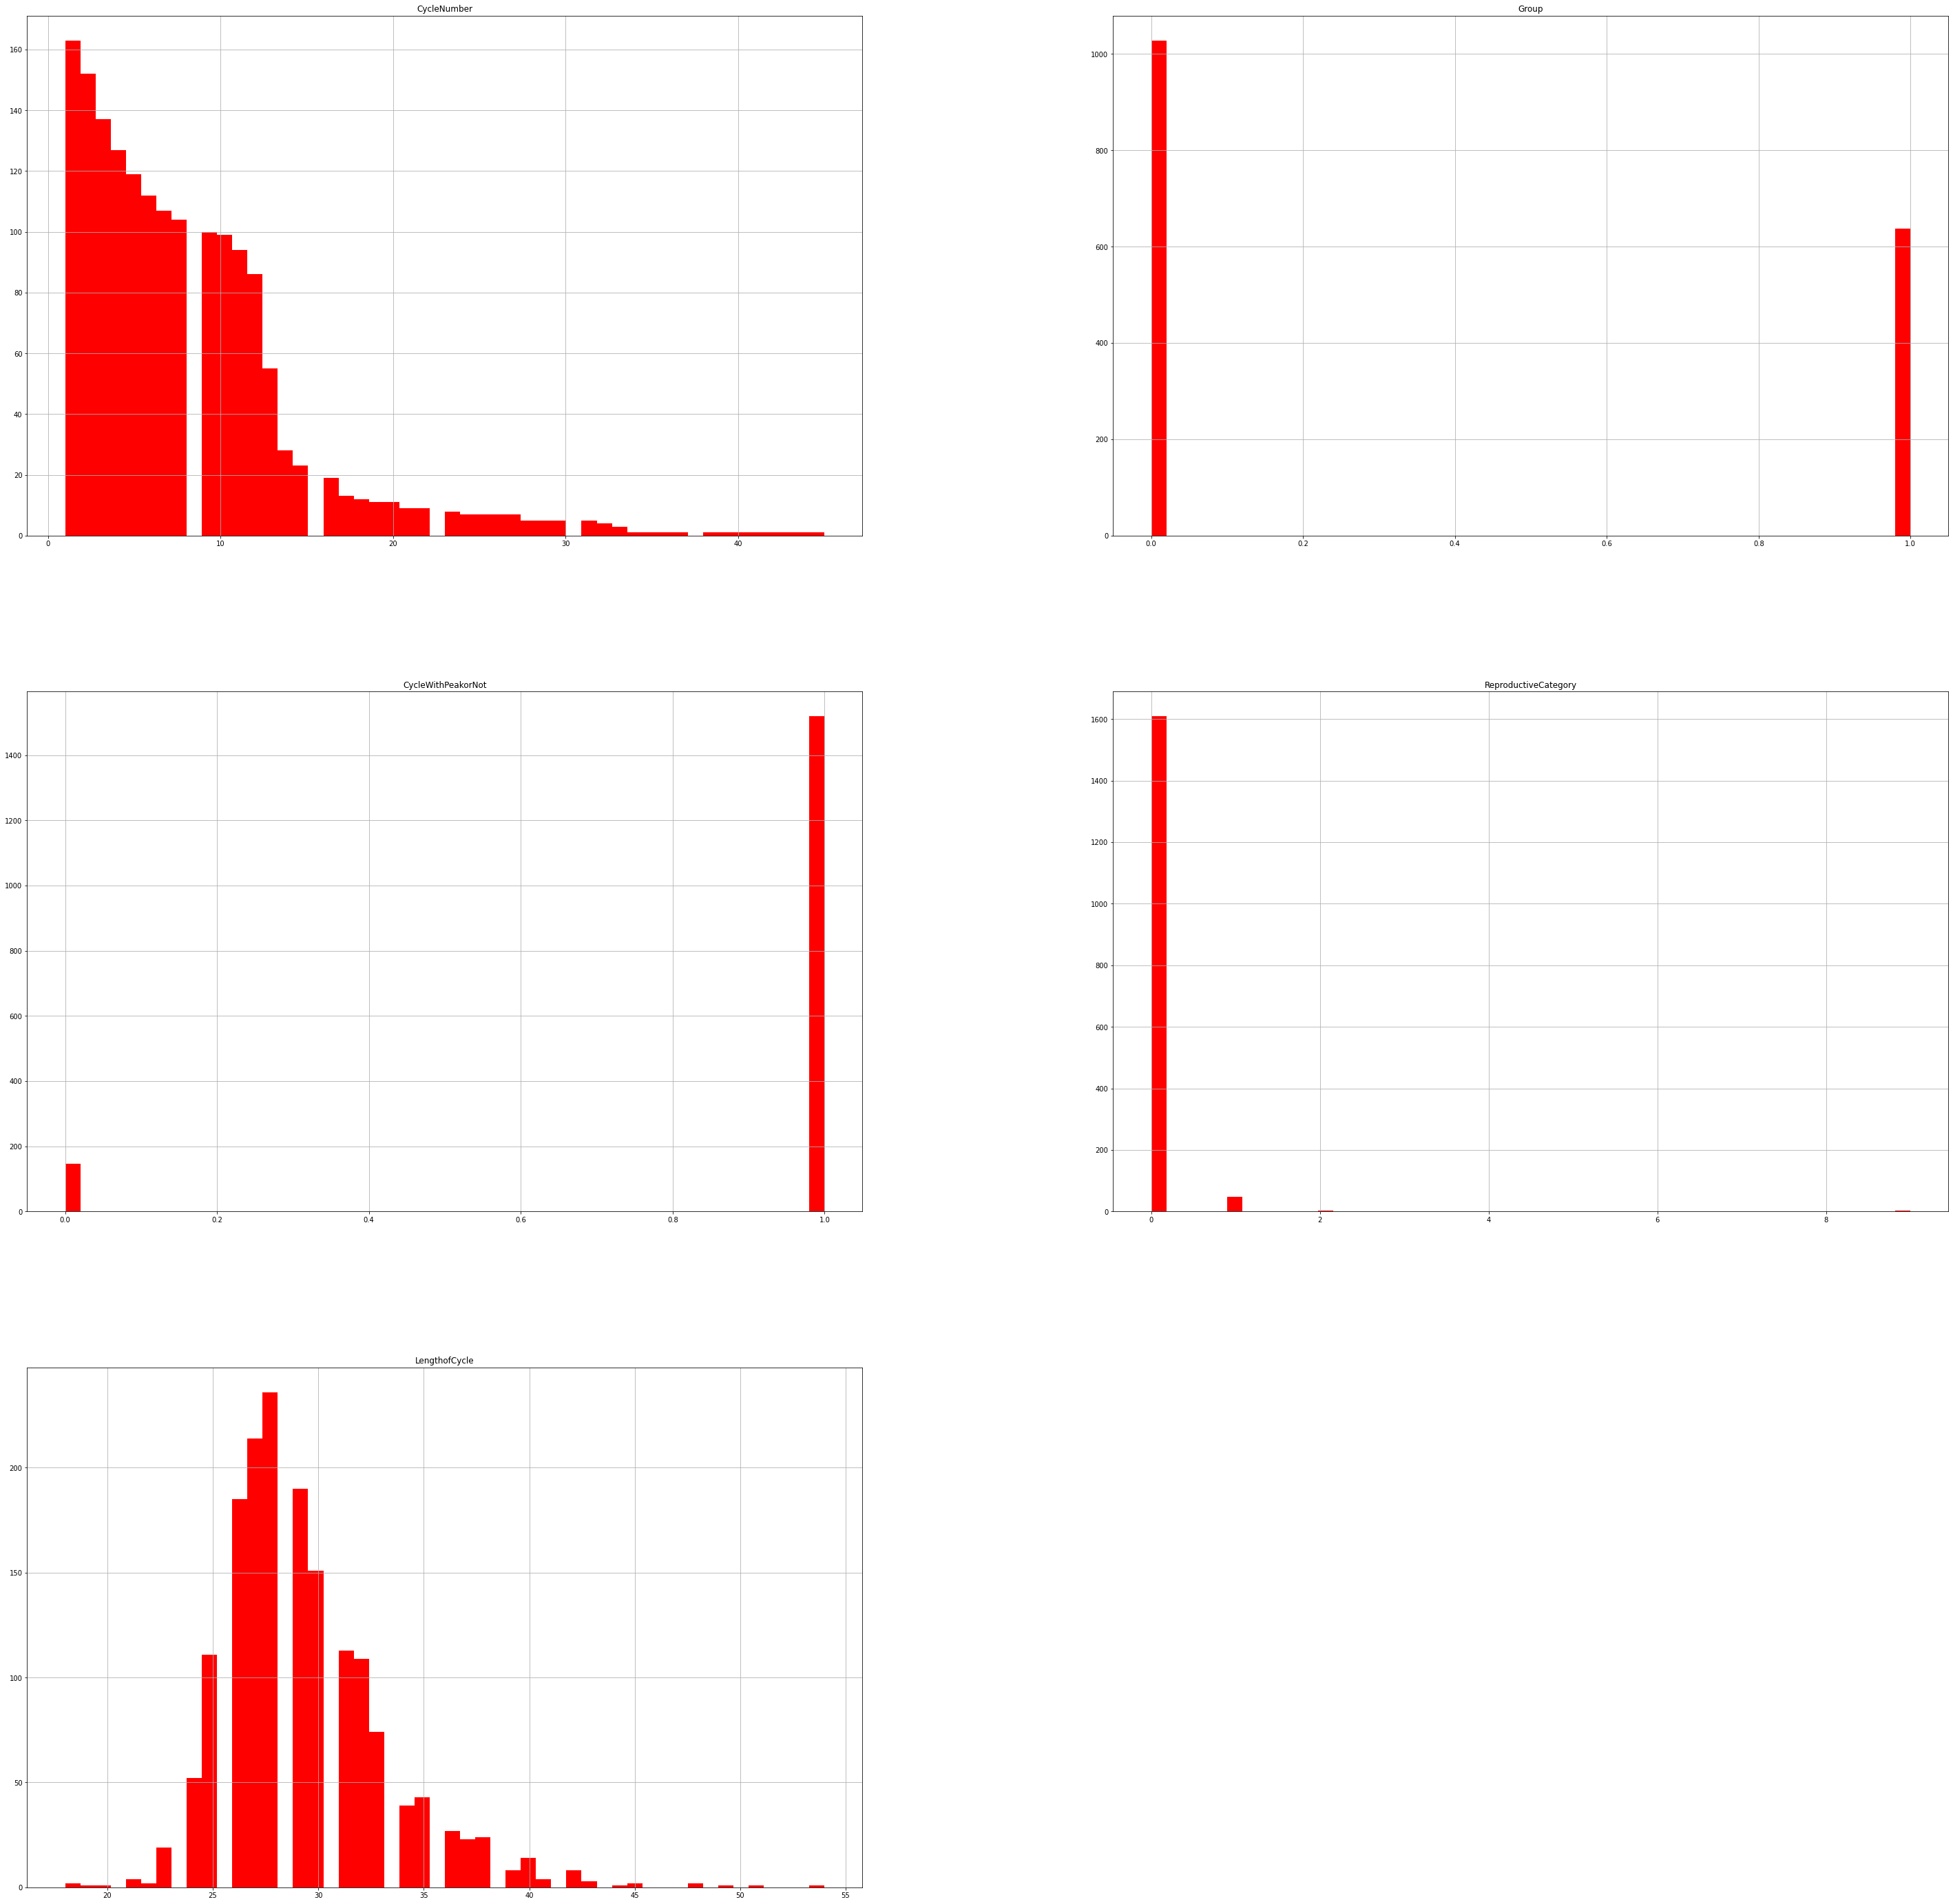

In [ ]:
df.hist(figsize=(50,50), bins=50, color="red");

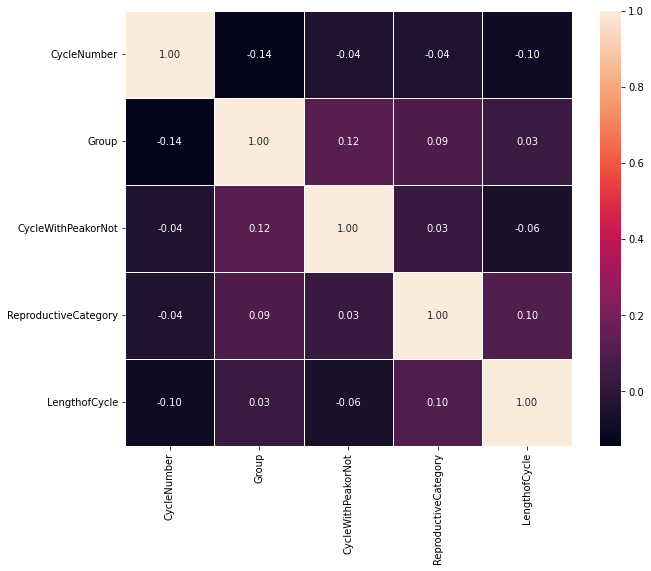

In [ ]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

In [ ]:
df.drop("ClientID",axis=1,inplace=True)

In [ ]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,1,0,1,0,29,27.33,17,12,12,5,...,9,,,2,7,7,1,1,0,21.254724111867
1,2,0,1,0,27,,15,12,13,2,...,,,,,,,,,,
2,3,0,1,0,29,,15,14,,1,...,,,,,,,,,,
3,4,0,1,0,27,,15,12,13,2,...,,,,,,,,,,
4,5,0,1,0,28,,16,12,12,4,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,,19,10,13,5,...,,,,,,,,,,
1661,8,1,1,0,28,,17,11,12,3,...,,,,,,,,,,
1662,9,1,1,0,28,,16,12,11,4,...,,,,,,,,,,
1663,10,1,1,1,40,,27,13,13,13,...,,,,,,,,,,


In [ ]:
df.drop('MedvitsM',axis=1,inplace=True)

In [ ]:
df.drop('Medvitexplain',axis=1,inplace=True)

In [ ]:
def Print_values(dfs):
  for i in dfs.columns:
    print(i,":-")
    print(dfs[f'{i}'].value_counts())
    print("\n")
    print("****************************************************")

Print_values(df)

CycleNumber :-
1     163
2     152
3     137
4     127
5     119
6     112
7     107
8     104
9     100
10     99
11     94
12     86
13     55
14     28
15     23
16     19
17     13
18     12
19     11
20     11
21      9
22      9
23      8
24      7
26      7
27      7
25      7
28      5
29      5
30      5
31      5
32      4
33      3
40      1
44      1
43      1
42      1
41      1
35      1
39      1
38      1
37      1
36      1
34      1
45      1
Name: CycleNumber, dtype: int64


****************************************************
Group :-
0    1028
1     637
Name: Group, dtype: int64


****************************************************
CycleWithPeakorNot :-
1    1519
0     146
Name: CycleWithPeakorNot, dtype: int64


****************************************************
ReproductiveCategory :-
0    1609
1      48
2       4
9       4
Name: ReproductiveCategory, dtype: int64


****************************************************
LengthofCycle :-
28    236
27    214
29   

In [ ]:
df.drop('MeanMensesLength',axis=1,inplace=True)
df.drop('Timeattemptpreg',axis=1,inplace=True)
df.drop('Spousesame',axis=1,inplace=True)
df.drop('SpousesameM',axis=1,inplace=True)
df.drop('NextpregM',axis=1,inplace=True)
df.drop('Whychart',axis=1,inplace=True)
df.drop('Methoddate',axis=1,inplace=True)
df.drop('Prevmethod',axis=1,inplace=True)
df.drop('Method',axis=1,inplace=True)
df.drop('Girls',axis=1,inplace=True)
df.drop('Boys',axis=1,inplace=True)
df.drop('Medvits',axis=1,inplace=True)
df.drop('LivingkidsM',axis=1,inplace=True)
df.drop('Reprocate',axis=1,inplace=True)
df.drop('Weight',axis=1,inplace=True)
df.drop('Height',axis=1,inplace=True)
df.drop('IncomeM',axis=1,inplace=True)
df.drop('SchoolyearsM',axis=1,inplace=True)
df.drop('Schoolyears',axis=1,inplace=True)
df.drop('EthnicityM',axis=1,inplace=True)
df.drop('Ethnicity',axis=1,inplace=True)
df.drop('ReligionM',axis=1,inplace=True)
df.drop('Wedding',axis=1,inplace=True)
df.drop('MaristatusM',axis=1,inplace=True)
df.drop('AgeM',axis=1,inplace=True)
df.drop('IntercourseDuringUnusBleed',axis=1,inplace=True)
df.drop('MeanCycleLength',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CycleNumber                 1665 non-null   int64 
 1   Group                       1665 non-null   int64 
 2   CycleWithPeakorNot          1665 non-null   int64 
 3   ReproductiveCategory        1665 non-null   int64 
 4   LengthofCycle               1665 non-null   int64 
 5   EstimatedDayofOvulation     1665 non-null   object
 6   LengthofLutealPhase         1665 non-null   object
 7   FirstDayofHigh              1665 non-null   object
 8   TotalNumberofHighDays       1665 non-null   object
 9   TotalHighPostPeak           1665 non-null   object
 10  TotalNumberofPeakDays       1665 non-null   object
 11  TotalDaysofFertility        1665 non-null   object
 12  TotalFertilityFormula       1665 non-null   object
 13  LengthofMenses              1665 non-null   obje

In [ ]:
df.drop('MensesScoreDayOne',axis=1,inplace=True)           
df.drop('MensesScoreDayTwo',axis=1,inplace=True)           
df.drop('MensesScoreDayThree',axis=1,inplace=True)         
df.drop('MensesScoreDayFour',axis=1,inplace=True)          
df.drop('MensesScoreDayFive',axis=1,inplace=True)          
df.drop('MensesScoreDaySix',axis=1,inplace=True)          
df.drop('MensesScoreDaySeven',axis=1,inplace=True)         
df.drop('MensesScoreDayEight',axis=1,inplace=True)         
df.drop('MensesScoreDayNine',axis=1,inplace=True)          
df.drop('MensesScoreDayTen',axis=1,inplace=True)           
df.drop('MensesScoreDay11',axis=1,inplace=True)           
df.drop('MensesScoreDay12',axis=1,inplace=True)           
df.drop('MensesScoreDay13',axis=1,inplace=True)            
df.drop('MensesScoreDay14',axis=1,inplace=True)            
df.drop('MensesScoreDay15',axis=1,inplace=True)           

In [ ]:
df.drop('Religion',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CycleNumber                 1665 non-null   int64 
 1   Group                       1665 non-null   int64 
 2   CycleWithPeakorNot          1665 non-null   int64 
 3   ReproductiveCategory        1665 non-null   int64 
 4   LengthofCycle               1665 non-null   int64 
 5   EstimatedDayofOvulation     1665 non-null   object
 6   LengthofLutealPhase         1665 non-null   object
 7   FirstDayofHigh              1665 non-null   object
 8   TotalNumberofHighDays       1665 non-null   object
 9   TotalHighPostPeak           1665 non-null   object
 10  TotalNumberofPeakDays       1665 non-null   object
 11  TotalDaysofFertility        1665 non-null   object
 12  TotalFertilityFormula       1665 non-null   object
 13  LengthofMenses              1665 non-null   obje

In [ ]:
Print_values(df)

CycleNumber :-
1     163
2     152
3     137
4     127
5     119
6     112
7     107
8     104
9     100
10     99
11     94
12     86
13     55
14     28
15     23
16     19
17     13
18     12
19     11
20     11
21      9
22      9
23      8
24      7
26      7
27      7
25      7
28      5
29      5
30      5
31      5
32      4
33      3
40      1
44      1
43      1
42      1
41      1
35      1
39      1
38      1
37      1
36      1
34      1
45      1
Name: CycleNumber, dtype: int64


****************************************************
Group :-
0    1028
1     637
Name: Group, dtype: int64


****************************************************
CycleWithPeakorNot :-
1    1519
0     146
Name: CycleWithPeakorNot, dtype: int64


****************************************************
ReproductiveCategory :-
0    1609
1      48
2       4
9       4
Name: ReproductiveCategory, dtype: int64


****************************************************
LengthofCycle :-
28    236
27    214
29   

In [ ]:
Age = list(df['Age'].unique())
Age

['36',
 ' ',
 '39',
 '29',
 '26',
 '25',
 '23',
 '33',
 '30',
 '31',
 '24',
 '27',
 '35',
 '37',
 '32',
 '38',
 '21',
 '34',
 '22',
 '28',
 '43',
 '41',
 '40',
 '42']

In [ ]:
Age.remove(' ')
import numpy as np
Age = np.array(Age)
Age = Age.astype(int)
Age = Age.mean()

In [ ]:
MeanBleedingIntensity = list(df['MeanBleedingIntensity'].unique())
MeanBleedingIntensity.remove(' ')
MeanBleedingIntensity = np.array(MeanBleedingIntensity)
MeanBleedingIntensity = MeanBleedingIntensity.astype(float)
MeanBleedingIntensity = MeanBleedingIntensity.mean()

In [ ]:
def Print_values(dfs):
  for i in dfs.columns:
    print(i,":-")
    print(dfs[f'{i}'].value_counts())
    print("\n")
    print("****************************************************")

Print_values(df)

CycleNumber :-
1     163
2     152
3     137
4     127
5     119
6     112
7     107
8     104
9     100
10     99
11     94
12     86
13     55
14     28
15     23
16     19
17     13
18     12
19     11
20     11
21      9
22      9
23      8
24      7
26      7
27      7
25      7
28      5
29      5
30      5
31      5
32      4
33      3
40      1
44      1
43      1
42      1
41      1
35      1
39      1
38      1
37      1
36      1
34      1
45      1
Name: CycleNumber, dtype: int64


****************************************************
Group :-
0    1028
1     637
Name: Group, dtype: int64


****************************************************
CycleWithPeakorNot :-
1    1519
0     146
Name: CycleWithPeakorNot, dtype: int64


****************************************************
ReproductiveCategory :-
0    1609
1      48
2       4
9       4
Name: ReproductiveCategory, dtype: int64


****************************************************
LengthofCycle :-
28    236
27    214
29   

In [ ]:
def removal(column):
  columns = list(df[column].unique())
  columns.remove(' ')
  columns = np.array(columns)
  columns = columns.astype(float)
  columns = columns.mean()
  return columns

In [ ]:
TotalMensesScore = removal('TotalMensesScore')
LengthofMenses = removal('LengthofMenses')

In [ ]:
df['Nextpreg'] = df['Nextpreg'].replace([' '], '0')
df['Urosurgeries'] = df['Urosurgeries'].replace([' '],'None')
df['MedvitexplainM'] = df['MedvitexplainM'].replace([' '],'None')
df['Gynosurgeries'] = df['Gynosurgeries'].replace([' '],'None')
df['Abortions'] = df['Abortions'].replace([' '],'0')
df['Miscarriages'] = df['Miscarriages'].replace([' '],'0')
df['Livingkids'] = df['Miscarriages'].replace([' '],'None')
df['Numberpreg'] = df['Numberpreg'].replace([' '],'0')
df['OccupationM'] = df['OccupationM'].replace([' '],'HomeMaker')
df['Yearsmarried'] = df['Yearsmarried'].replace([' '],'0')
df['Maristatus'] = df['Maristatus'].replace([' '],'0')
df['Age'] = df['Age'].replace([' '],f"{Age}")
df['PhasesBleeding'] = df['PhasesBleeding'].replace([' '],'Not Comfortable to answer')
df['UnusualBleeding'] = df['UnusualBleeding'].replace([' '],'Not Comfortable to answer')
df['IntercourseInFertileWindow'] = df['IntercourseInFertileWindow'].replace([' '],'Not Comfortable to answer')
df['NumberofDaysofIntercourse'] = df['NumberofDaysofIntercourse'].replace([' '],'0')
df['MeanBleedingIntensity'] = df['MeanBleedingIntensity'].replace([' '],f"{MeanBleedingIntensity}")
df['TotalMensesScore'] = df['TotalMensesScore'].replace([' '],f"{round(TotalMensesScore)}")
df['LengthofMenses'] = df['LengthofMenses'].replace([' '],f"{round(LengthofMenses)}")

In [ ]:
df.drop('TotalFertilityFormula',axis=1,inplace=True)

In [ ]:
#Remove Total Fertility Formula
#Instead of mean ,max occurence 'TotalDaysofFertility 'TotalNumberofPeakDays' "TotalHighPostPeak","TotalNumberofPeakDays","TotalHighPostPeak","TotalNumberofHighDays","FirstDayofHigh","LengthofLutealPhase","EstimatedDayofOvulation"
#TotalMensesScore and LengthofMenses should be rounded off
#Mean Bleeding Intensity,Age

In [ ]:
def numericals(column):
  columns = list(df[column].unique())
  columns.remove(' ')
  columns = np.array(columns)
  columns = columns.astype(int)
  columns = columns.max()
  return columns

In [ ]:
TotalDaysofFertility_score = numericals('TotalDaysofFertility')
TotalNumberofPeakDays_score = numericals('TotalNumberofPeakDays')
TotalHighPostPeak_score = numericals('TotalHighPostPeak')
TotalNumberofPeakDays_score = numericals('TotalNumberofPeakDays')
TotalHighPostPeak_score = numericals('TotalHighPostPeak')
TotalNumberofHighDays_score = numericals('TotalNumberofHighDays')
FirstDayofHigh_score = numericals('FirstDayofHigh')
LengthofLutealPhase_score = numericals('LengthofLutealPhase')
EstimatedDayofOvulation_score = numericals('EstimatedDayofOvulation')

In [ ]:
df['TotalDaysofFertility'] = df['EstimatedDayofOvulation'].replace([' '],f"{TotalDaysofFertility_score}")
df['TotalNumberofPeakDays'] = df['TotalNumberofPeakDays'].replace([' '],f"{TotalNumberofPeakDays_score}")
df['TotalHighPostPeak'] = df['TotalHighPostPeak'].replace([' '],f"{TotalHighPostPeak_score}")
df['TotalNumberofPeakDays'] = df['TotalNumberofPeakDays'].replace([' '],f"{TotalNumberofPeakDays_score}")
df['TotalHighPostPeak'] = df['TotalHighPostPeak'].replace([' '],f"{TotalHighPostPeak_score}")
df['TotalNumberofHighDays'] = df['TotalNumberofHighDays'].replace([' '],f"{TotalNumberofHighDays_score}")
df['FirstDayofHigh'] = df['FirstDayofHigh'].replace([' '],f"{FirstDayofHigh_score}")
df['LengthofLutealPhase'] = df['LengthofLutealPhase'].replace([' '],f"{LengthofLutealPhase_score}")
df['EstimatedDayofOvulation'] = df['EstimatedDayofOvulation'].replace([' '],f"{EstimatedDayofOvulation_score}")

In [ ]:
BMI_Score = removal('BMI')
df['BMI'] = df['BMI'].replace([' '],f"23")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CycleNumber                 1665 non-null   int64 
 1   Group                       1665 non-null   int64 
 2   CycleWithPeakorNot          1665 non-null   int64 
 3   ReproductiveCategory        1665 non-null   int64 
 4   LengthofCycle               1665 non-null   int64 
 5   EstimatedDayofOvulation     1665 non-null   object
 6   LengthofLutealPhase         1665 non-null   object
 7   FirstDayofHigh              1665 non-null   object
 8   TotalNumberofHighDays       1665 non-null   object
 9   TotalHighPostPeak           1665 non-null   object
 10  TotalNumberofPeakDays       1665 non-null   object
 11  TotalDaysofFertility        1665 non-null   object
 12  LengthofMenses              1665 non-null   object
 13  TotalMensesScore            1665 non-null   obje

In [ ]:
df.head()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,Numberpreg,Livingkids,Miscarriages,Abortions,Gynosurgeries,MedvitexplainM,Urosurgeries,Breastfeeding,Nextpreg,BMI
0,1,0,1,0,29,17,12,12,5,0,...,3,0,0,0,None,None,None,0,7,21.254724111867
1,2,0,1,0,27,15,12,13,2,0,...,0,0,0,0,None,None,None,,0,23
2,3,0,1,0,29,15,14,26,1,0,...,0,0,0,0,None,None,None,,0,23
3,4,0,1,0,27,15,12,13,2,0,...,0,0,0,0,None,None,None,,0,23
4,5,0,1,0,28,16,12,12,4,0,...,0,0,0,0,None,None,None,,0,23


In [ ]:
Print_values(df)

CycleNumber :-
1     163
2     152
3     137
4     127
5     119
6     112
7     107
8     104
9     100
10     99
11     94
12     86
13     55
14     28
15     23
16     19
17     13
18     12
19     11
20     11
21      9
22      9
23      8
24      7
26      7
27      7
25      7
28      5
29      5
30      5
31      5
32      4
33      3
40      1
44      1
43      1
42      1
41      1
35      1
39      1
38      1
37      1
36      1
34      1
45      1
Name: CycleNumber, dtype: int64


****************************************************
Group :-
0    1028
1     637
Name: Group, dtype: int64


****************************************************
CycleWithPeakorNot :-
1    1519
0     146
Name: CycleWithPeakorNot, dtype: int64


****************************************************
ReproductiveCategory :-
0    1609
1      48
2       4
9       4
Name: ReproductiveCategory, dtype: int64


****************************************************
LengthofCycle :-
28    236
27    214
29   

In [ ]:
df['BMI']=df['BMI'].astype(float)

In [ ]:
df['CycleNumber'] = df['CycleNumber'].astype(float)
df['Group'] = df['Group'].astype(int)
df['CycleWithPeakorNot'] = df['CycleWithPeakorNot'].astype(int)
df['ReproductiveCategory'] = df['ReproductiveCategory'].astype(int)
df['LengthofCycle'] = df['LengthofCycle'].astype(int)
df['EstimatedDayofOvulation'] = df['EstimatedDayofOvulation'].astype(float)
df['LengthofLutealPhase'] = df['LengthofLutealPhase'].astype(float)
df['FirstDayofHigh'] = df['FirstDayofHigh'].astype(float)
df['TotalNumberofHighDays'] = df['TotalNumberofHighDays'].astype(float)
df['TotalHighPostPeak'] = df['TotalHighPostPeak'].astype(float)
df['TotalNumberofPeakDays'] = df['TotalNumberofPeakDays'].astype(float)
df['TotalDaysofFertility'] = df['TotalDaysofFertility'].astype(float)
df['LengthofMenses'] = df['LengthofMenses'].astype(float)
df['TotalMensesScore'] = df['TotalMensesScore'].astype(float)
df['MeanBleedingIntensity'] = df['MeanBleedingIntensity'].astype(float)
df['NumberofDaysofIntercourse'] = df['NumberofDaysofIntercourse'].astype(int)
df['Age'] = df['Age'].astype(float)
df['Yearsmarried'] = df['Yearsmarried'].astype(float)
df['Numberpreg'] = df['Numberpreg'].astype(int)
df['Livingkids'] = df['Livingkids'].astype(int)
df['Miscarriages'] = df['Miscarriages'].astype(int)
df['Abortions'] = df['Abortions'].astype(int)
df['Nextpreg'] = df['Nextpreg'].astype(int)

In [ ]:
df['Breastfeeding'].value_counts()

     1523
0     127
2      11
4       2
6       1
3       1
Name: Breastfeeding, dtype: int64

In [ ]:
Breastfeeding = numericals('Breastfeeding')

In [ ]:
df['Breastfeeding'] = df['Breastfeeding'].replace([' '],f"{Breastfeeding}")
df['Breastfeeding'] = df['Breastfeeding'].astype(float)

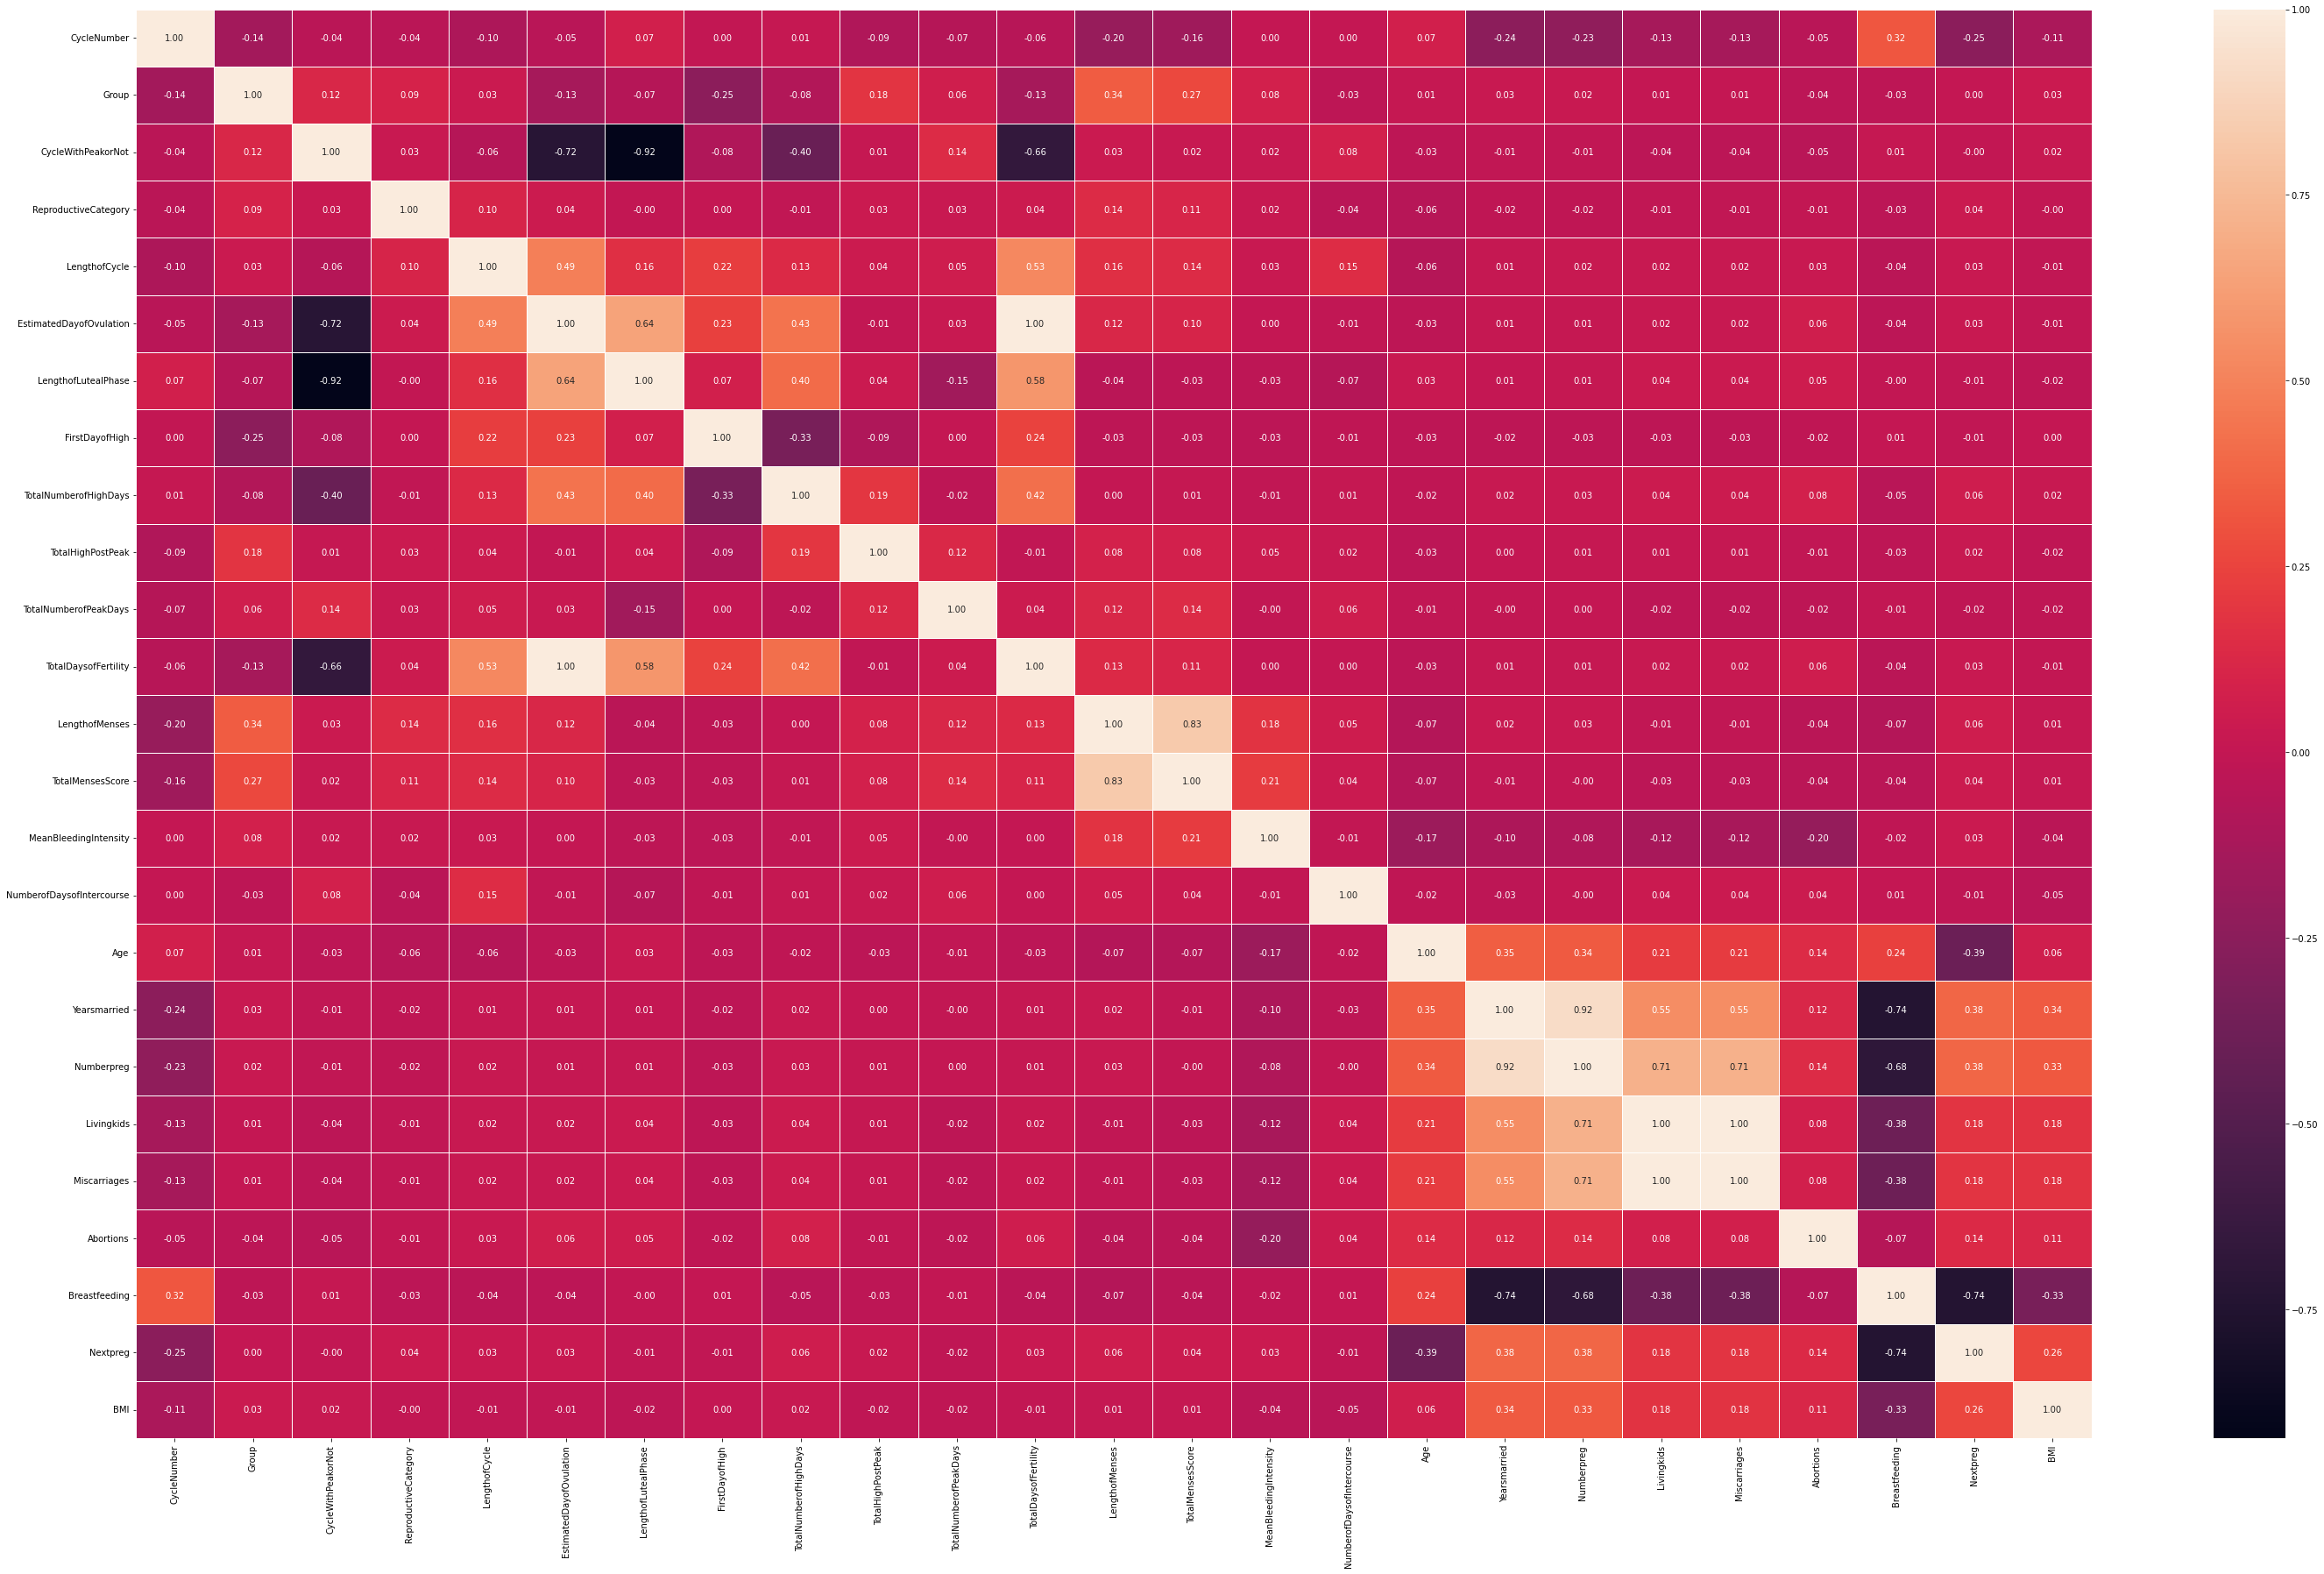

In [ ]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(50,30))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

<Axes: title={'center': 'Correlation with Length_Of_Cycle'}>

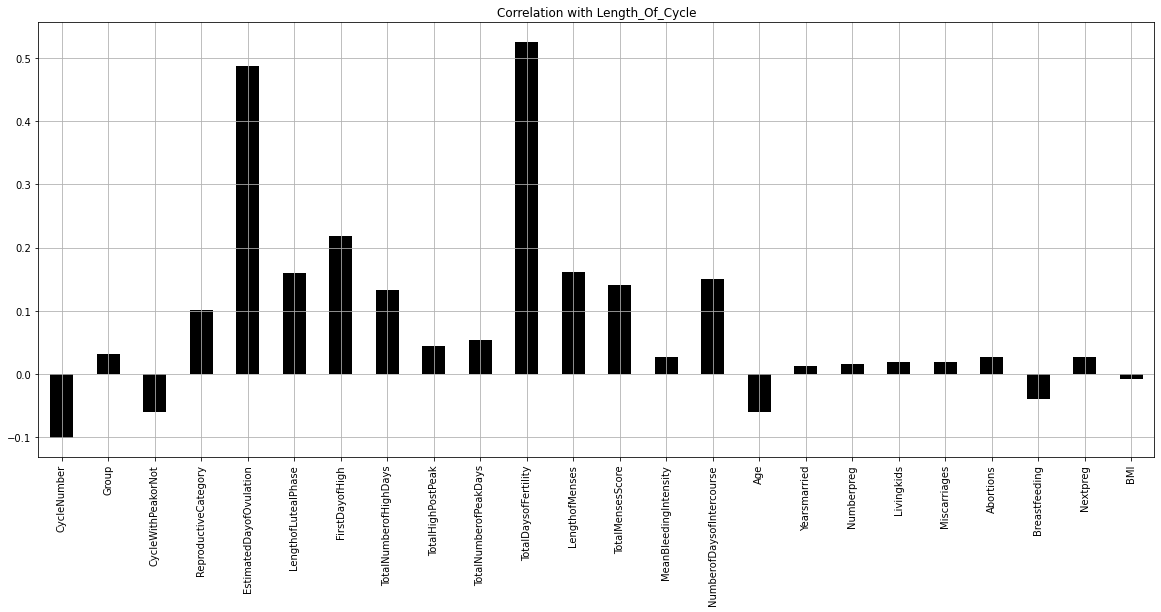

In [ ]:
df.drop('LengthofCycle', axis=1).corrwith(df.LengthofCycle).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_Of_Cycle",color="Black")

<Axes: title={'center': 'Correlation with Estimated_Day_Of_Evolution'}>

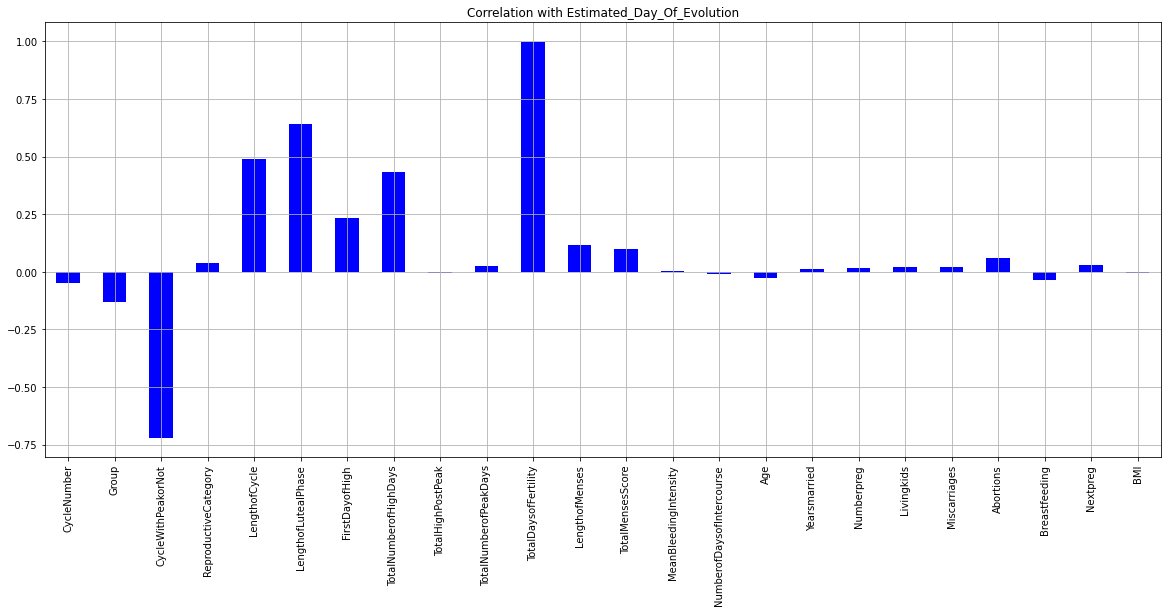

In [ ]:
df.drop('EstimatedDayofOvulation', axis=1).corrwith(df.EstimatedDayofOvulation).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Estimated_Day_Of_Evolution",color="Blue")

<Axes: title={'center': 'Correlation with Length_of_LutealPhase'}>

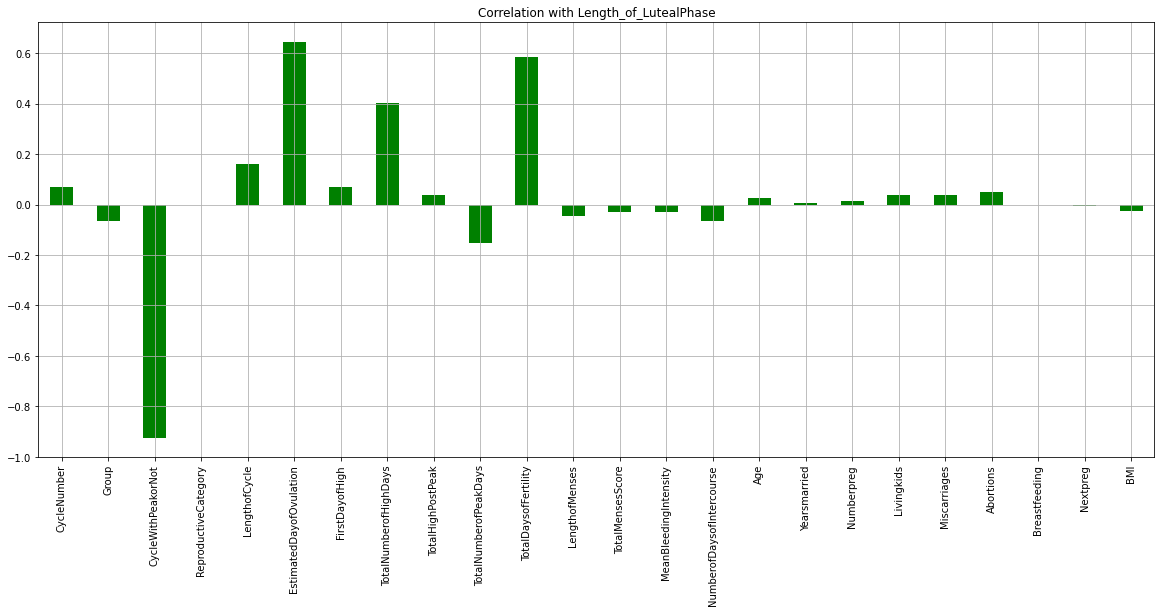

In [ ]:
df.drop('LengthofLutealPhase', axis=1).corrwith(df.LengthofLutealPhase).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_of_LutealPhase",color="Green")

<Axes: ylabel='Frequency'>

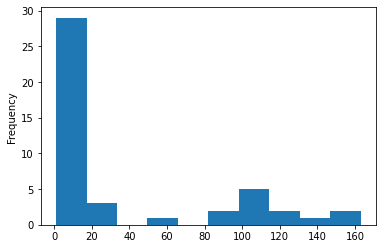

In [ ]:
df['CycleNumber'].value_counts().plot(kind='hist')

In [ ]:
Print_values(df)

CycleNumber :-
1.0     163
2.0     152
3.0     137
4.0     127
5.0     119
6.0     112
7.0     107
8.0     104
9.0     100
10.0     99
11.0     94
12.0     86
13.0     55
14.0     28
15.0     23
16.0     19
17.0     13
18.0     12
19.0     11
20.0     11
21.0      9
22.0      9
23.0      8
24.0      7
26.0      7
27.0      7
25.0      7
28.0      5
29.0      5
30.0      5
31.0      5
32.0      4
33.0      3
40.0      1
44.0      1
43.0      1
42.0      1
41.0      1
35.0      1
39.0      1
38.0      1
37.0      1
36.0      1
34.0      1
45.0      1
Name: CycleNumber, dtype: int64


****************************************************
Group :-
0    1028
1     637
Name: Group, dtype: int64


****************************************************
CycleWithPeakorNot :-
1    1519
0     146
Name: CycleWithPeakorNot, dtype: int64


****************************************************
ReproductiveCategory :-
0    1609
1      48
2       4
9       4
Name: ReproductiveCategory, dtype: int64


*****

In [ ]:
df.drop('Maristatus',axis=1,inplace=True)

In [ ]:
df.drop('Urosurgeries',axis=1,inplace=True)
df.drop('MedvitexplainM',axis=1,inplace=True)
df.drop('Gynosurgeries',axis=1,inplace=True)
df.drop('Abortions',axis=1,inplace=True)
df.drop('Livingkids',axis=1,inplace=True)
df.drop('Yearsmarried',axis=1,inplace=True)
df.drop('PhasesBleeding',axis=1,inplace=True)
df.drop('MeanBleedingIntensity',axis=1,inplace=True)
df.drop('TotalHighPostPeak',axis=1,inplace=True)
df.drop('FirstDayofHigh',axis=1,inplace=True)
df.drop('ReproductiveCategory',axis=1,inplace=True)

<Axes: title={'center': 'Correlation with Length_Of_Cycle'}>

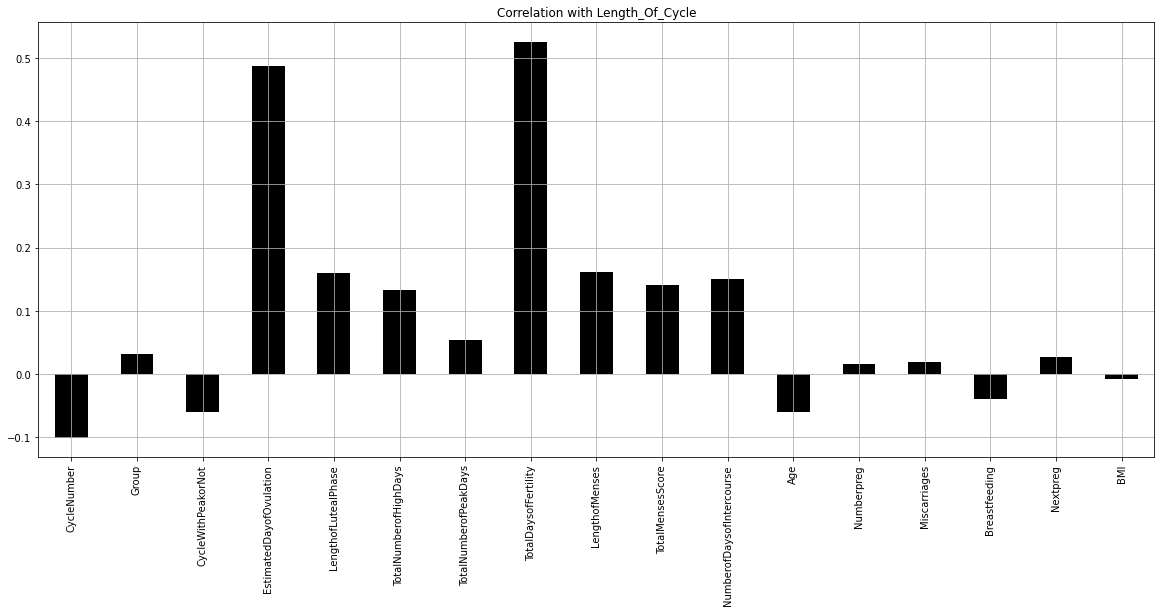

In [ ]:
df.drop('LengthofCycle', axis=1).corrwith(df.LengthofCycle).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_Of_Cycle",color="Black")

<Axes: title={'center': 'Correlation with Estimated_Day_Of_Evolution'}>

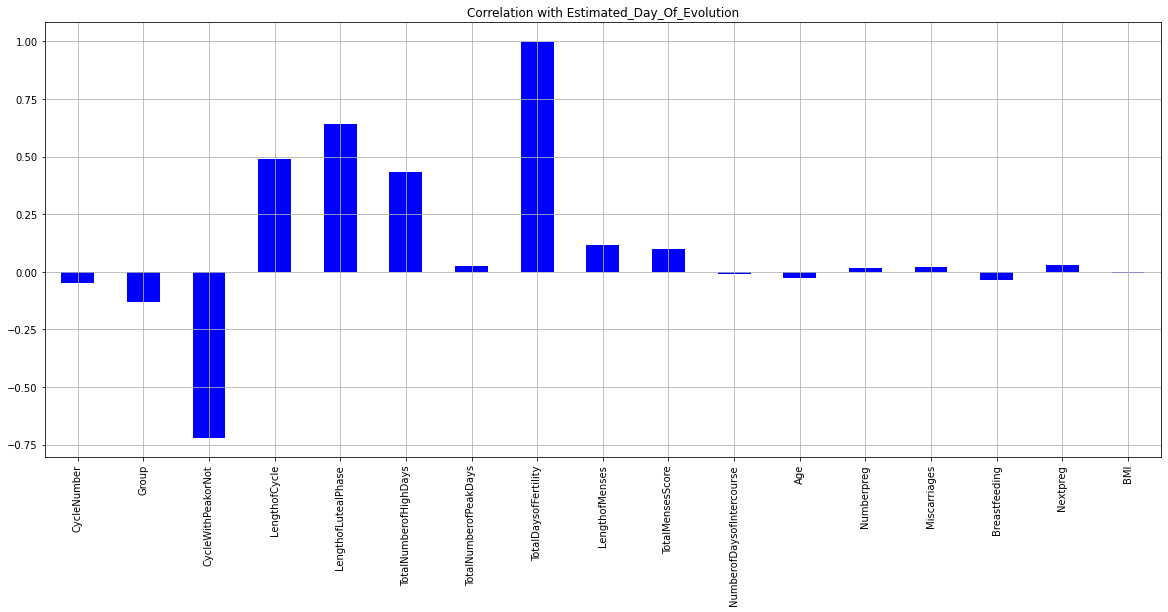

In [ ]:
df.drop('EstimatedDayofOvulation', axis=1).corrwith(df.EstimatedDayofOvulation).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Estimated_Day_Of_Evolution",color="Blue")

<Axes: title={'center': 'Correlation with Length_of_LutealPhase'}>

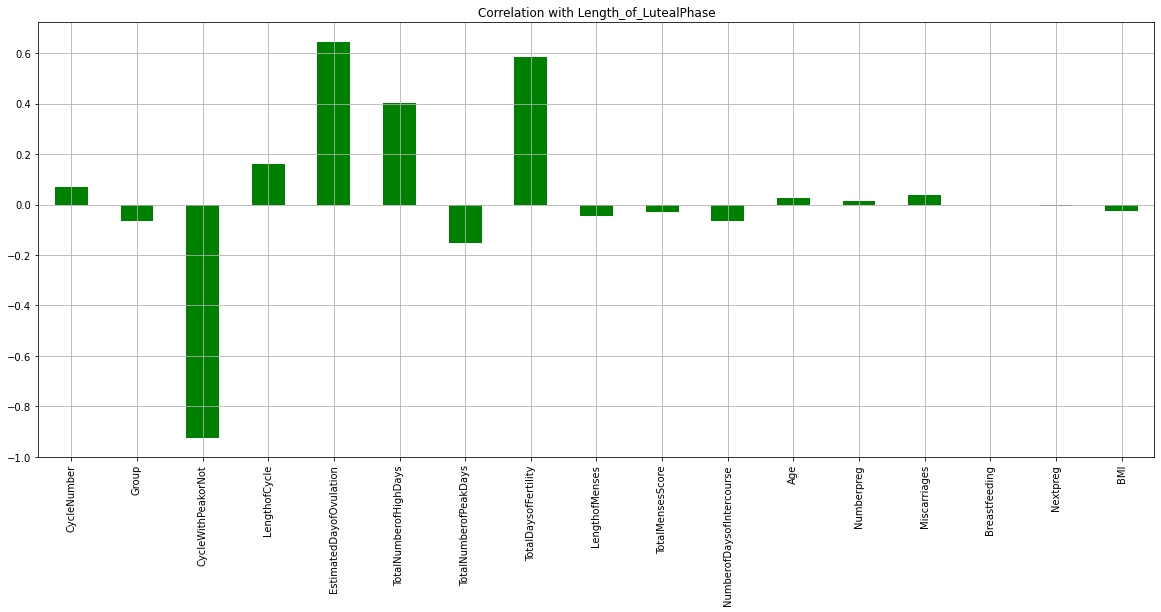

In [ ]:
df.drop('LengthofLutealPhase', axis=1).corrwith(df.LengthofLutealPhase).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_of_LutealPhase",color="Green")

<Axes: title={'center': 'Correlation with Length_of_LutealPhase'}>

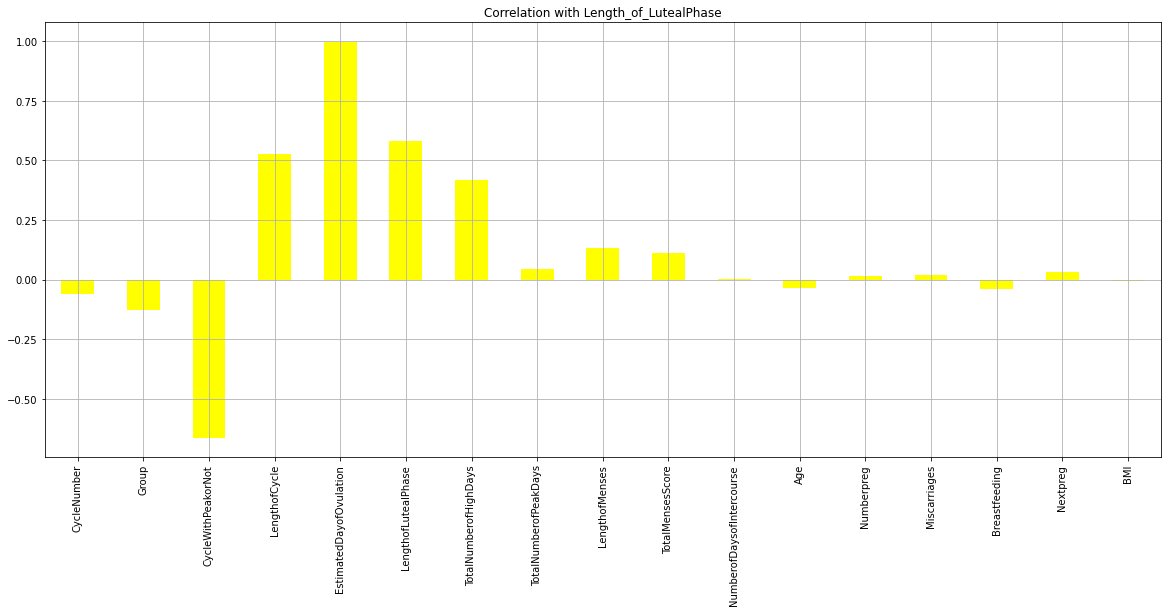

In [ ]:
df.drop('TotalDaysofFertility', axis=1).corrwith(df.TotalDaysofFertility).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_of_LutealPhase",color="Yellow")

##*Division Of Dataset*

In [ ]:
Length_i = []
y=0

for i in df['LengthofMenses']:
  if i == 10.0:
    Length_i.append(y)
  if i == 11.0:
    Length_i.append(y)
  if i == 15.0:
    Length_i.append(i)

  y+=1

In [ ]:
df.drop(Length_i,axis=0,inplace=True)

In [ ]:
X = df.drop('LengthofCycle',axis=1)
X=X.drop('EstimatedDayofOvulation',axis=1)
X=X.drop('LengthofLutealPhase',axis=1)
X=X.drop('TotalDaysofFertility',axis=1)
X=X.drop('TotalMensesScore',axis=1)
X=X.drop('Group',axis=1)

In [ ]:
for i in range(0,6):
  df.loc[df["OccupationM"] == i, "OccupationM"]='Working Professional'

<Axes: title={'center': 'Correlation with Length_Of_Cycle'}>

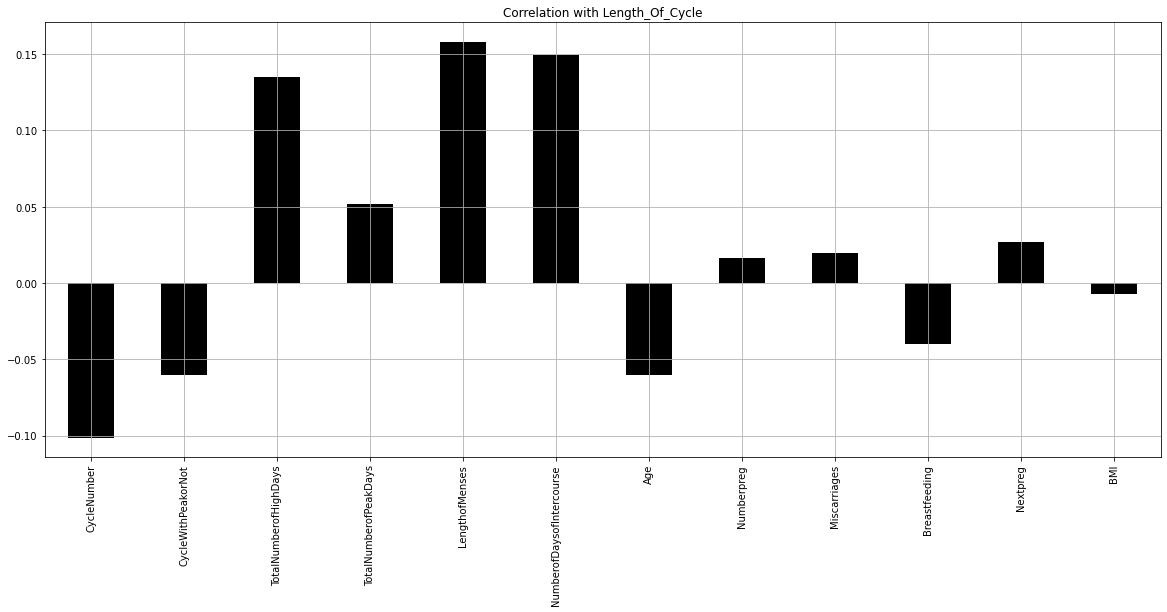

In [ ]:
X['LengthofCycle'] = df['LengthofCycle']
X.drop('LengthofCycle', axis=1).corrwith(X.LengthofCycle).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_Of_Cycle",color="Black")

<Axes: title={'center': 'Correlation with Estimated_Day_Of_Evolution'}>

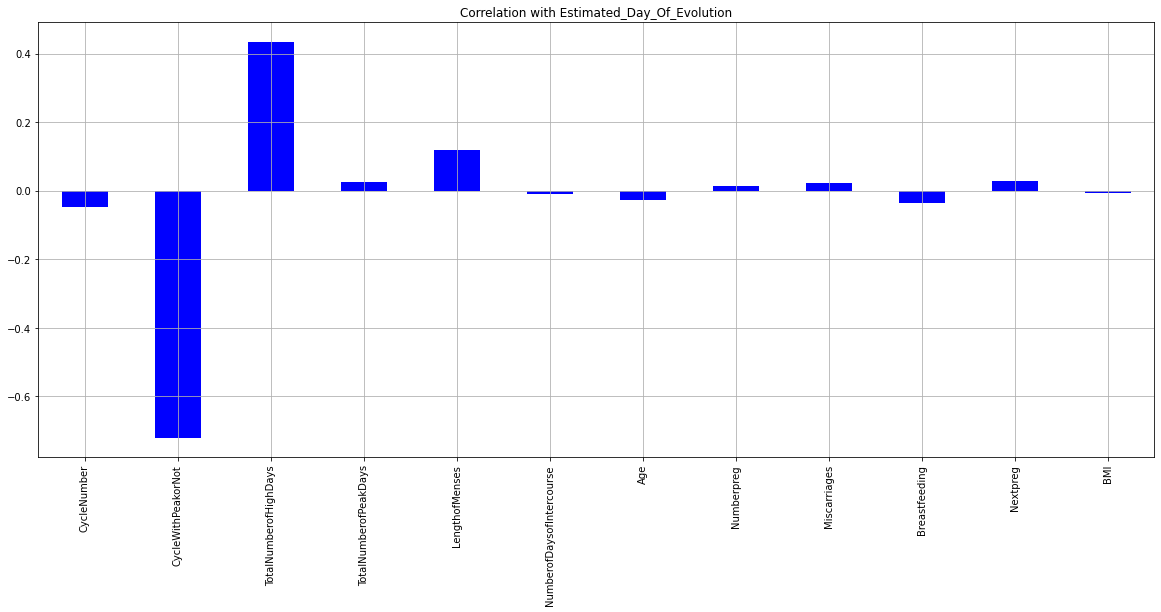

In [ ]:
X=X.drop('LengthofCycle',axis=1)
X['EstimatedDayofOvulation'] = df['EstimatedDayofOvulation']
X.drop('EstimatedDayofOvulation', axis=1).corrwith(X.EstimatedDayofOvulation).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Estimated_Day_Of_Evolution",color="Blue")

<Axes: title={'center': 'Correlation with Length_Of_Leutal-Phase'}>

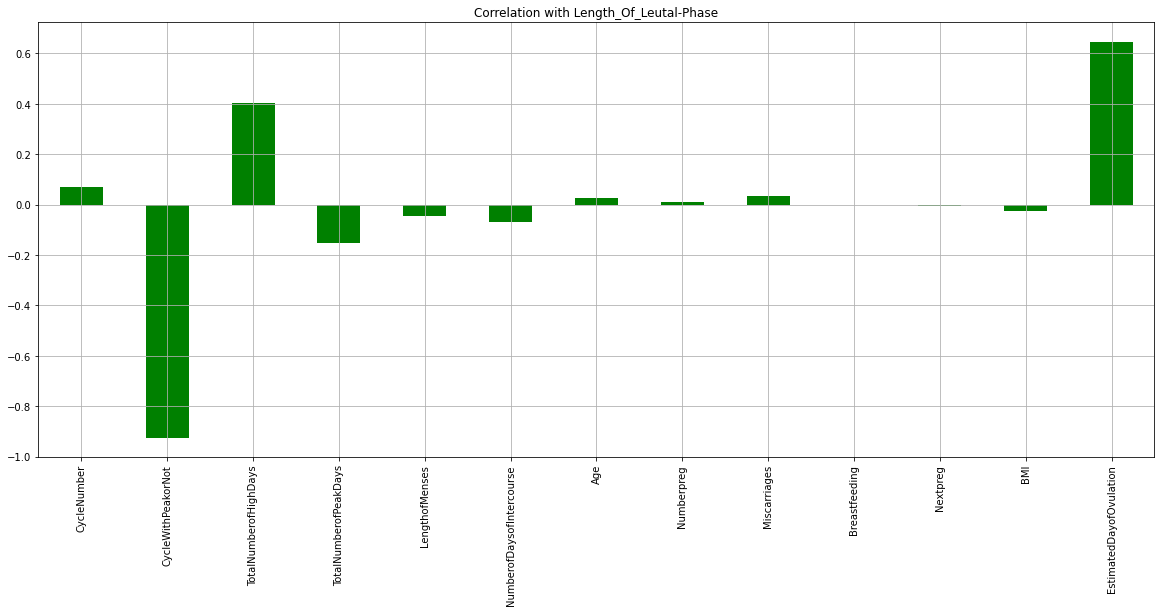

In [ ]:
# X=X.drop('EstimatedDayofOvulation',axis=1)
X['LengthofLutealPhase'] = df['LengthofLutealPhase']
X.drop('LengthofLutealPhase', axis=1).corrwith(X.LengthofLutealPhase).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_Of_Leutal-Phase",color="green")

<Axes: title={'center': 'Correlation with Length_of_Total-Days-Of-Fertility'}>

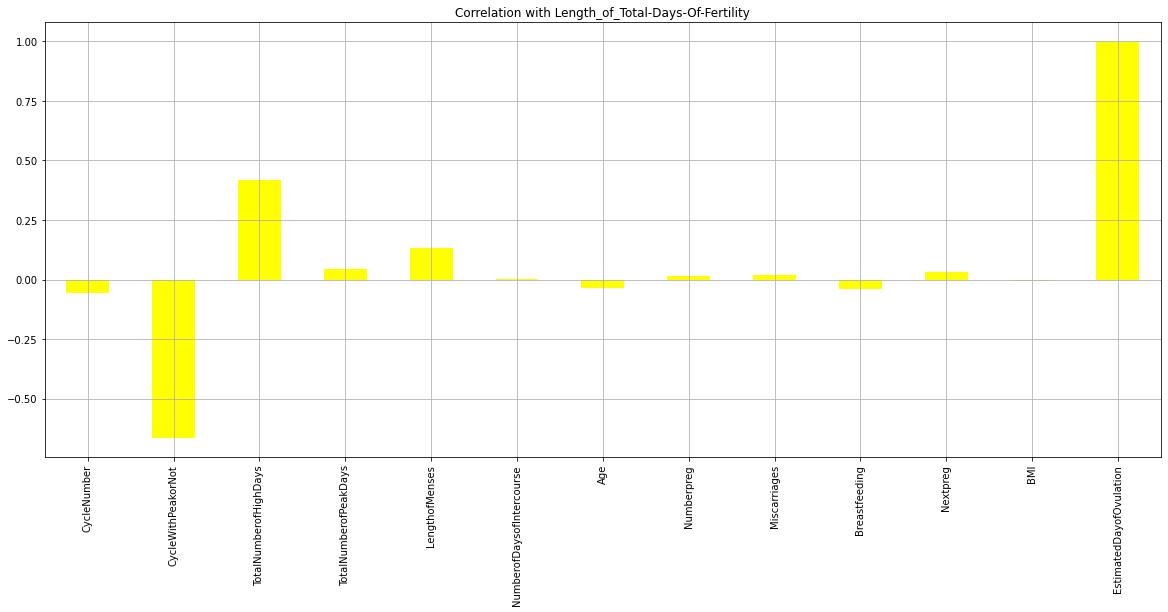

In [ ]:
X=X.drop('LengthofLutealPhase',axis=1)
X['TotalDaysofFertility'] = df['TotalDaysofFertility']
X.drop('TotalDaysofFertility', axis=1).corrwith(X.TotalDaysofFertility).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Length_of_Total-Days-Of-Fertility",color="Yellow")

In [ ]:
X.drop('TotalDaysofFertility',axis=1,inplace=True)

<Axes: title={'center': 'Correlation with Total-Menses-Score'}>

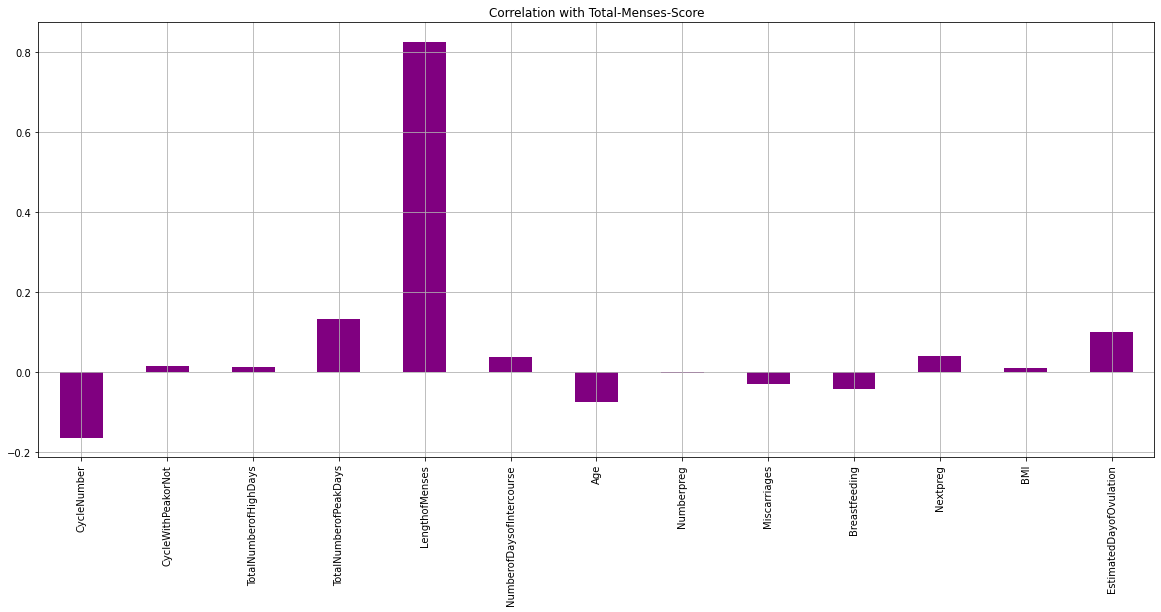

In [ ]:
X['TotalMensesScore'] = df['TotalMensesScore']
X.drop('TotalMensesScore', axis=1).corrwith(X.TotalMensesScore).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Total-Menses-Score",color="Purple")

<Axes: title={'center': 'Correlation with Group'}>

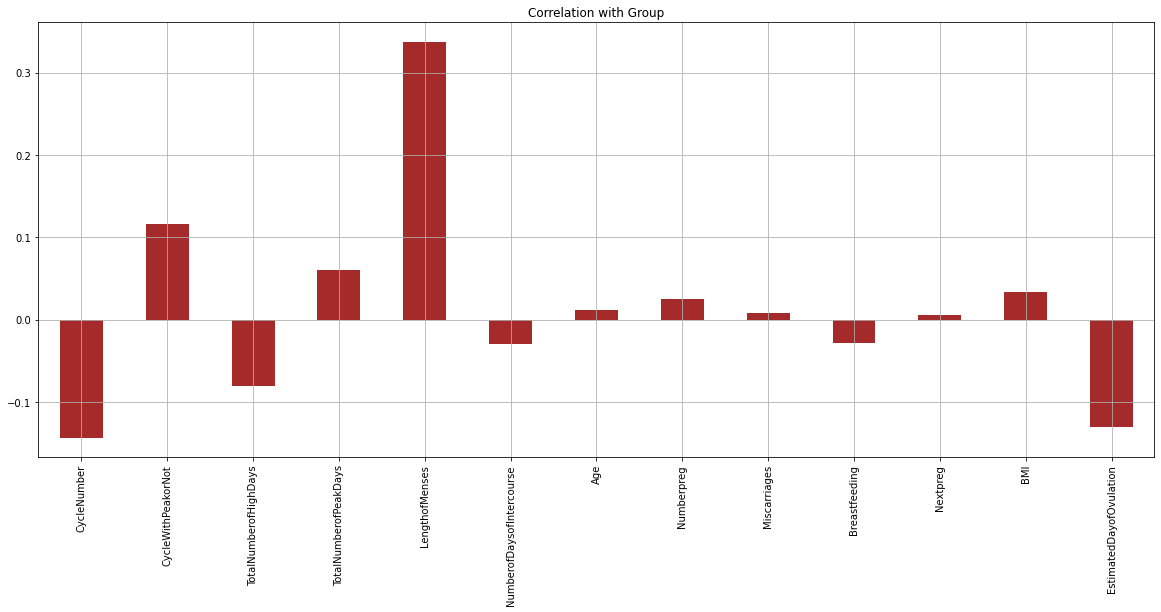

In [ ]:
X.drop('TotalMensesScore',axis=1,inplace=True)
X['Group'] = df['Group']
X.drop('Group', axis=1).corrwith(X.Group).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Group",color="Brown")

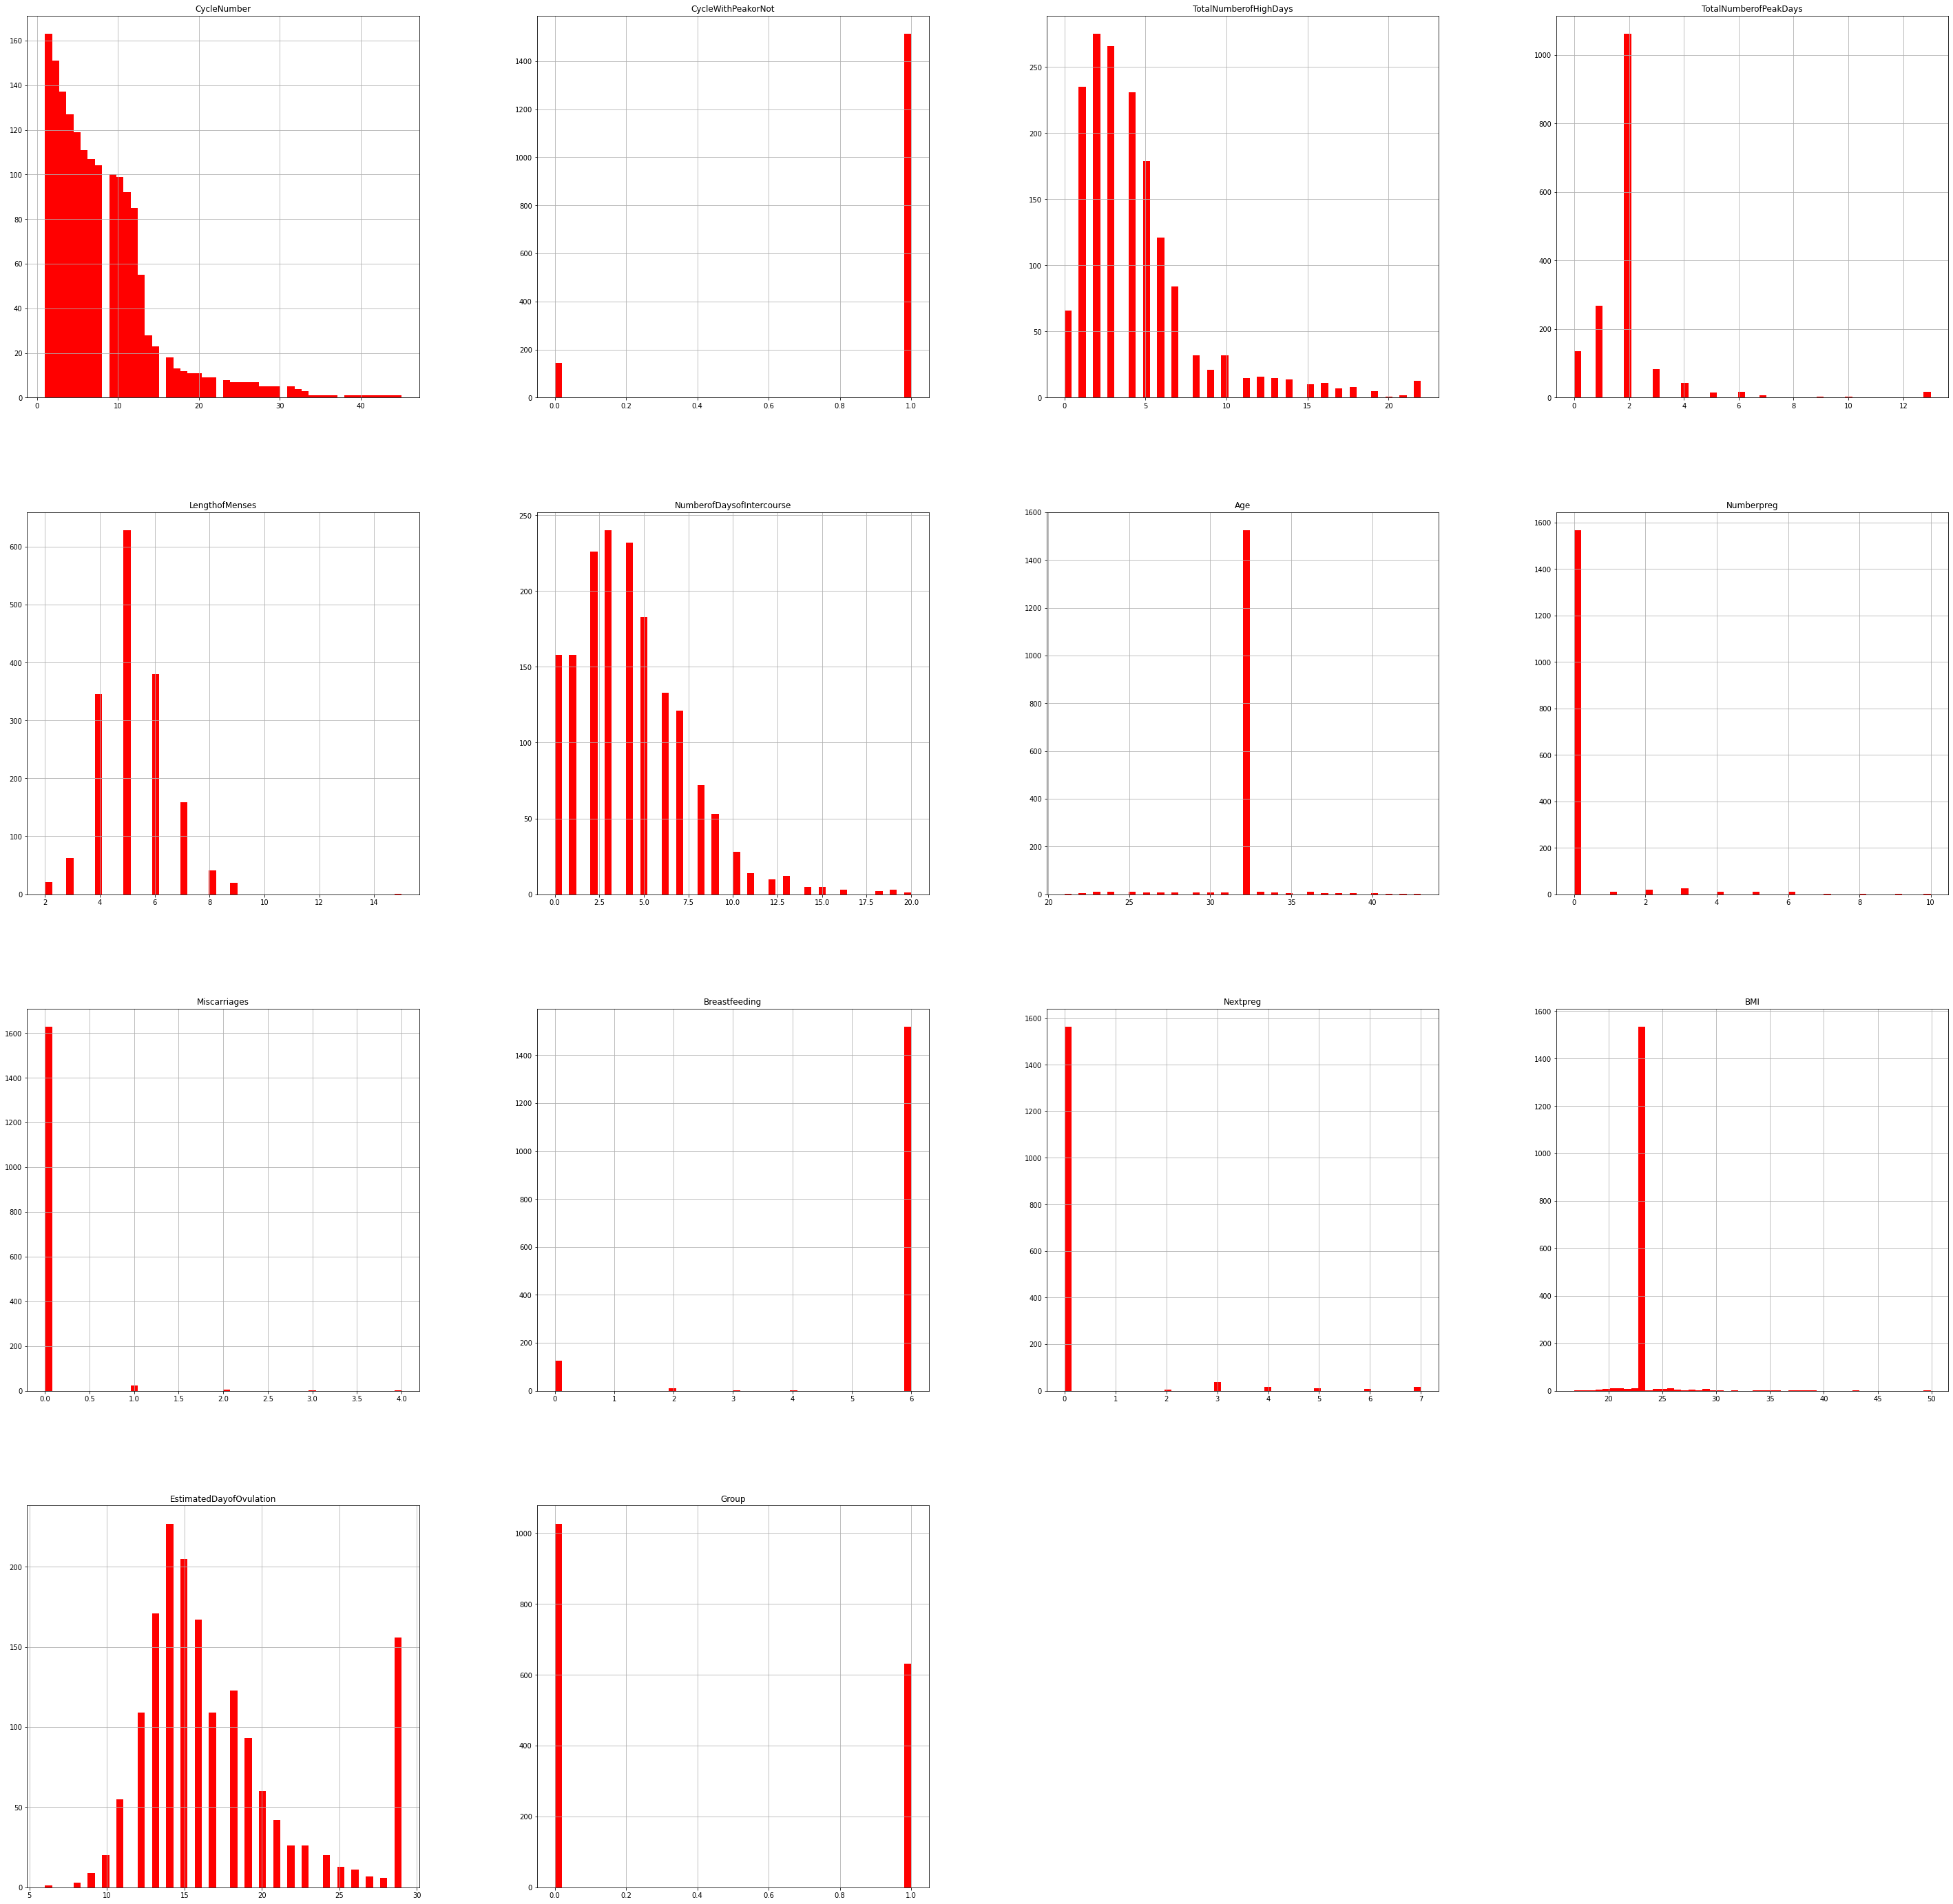

In [ ]:
X.hist(figsize=(50,50), bins=50, color="red");

In [ ]:
X.columns

Index(['CycleNumber', 'CycleWithPeakorNot', 'TotalNumberofHighDays',
       'TotalNumberofPeakDays', 'LengthofMenses', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding', 'Age', 'OccupationM',
       'Numberpreg', 'Miscarriages', 'Breastfeeding', 'Nextpreg', 'BMI',
       'EstimatedDayofOvulation', 'Group'],
      dtype='object')

#***LengthofCycle***

In [ ]:
Y = df['LengthofCycle'].astype(float)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
Print_values(X_train)

CycleNumber :-
1.0     126
2.0     113
3.0     106
4.0     104
5.0     101
6.0      90
7.0      89
10.0     81
8.0      81
9.0      80
11.0     74
12.0     69
13.0     45
14.0     23
15.0     18
16.0     12
17.0     11
20.0     11
19.0     10
21.0      9
18.0      9
22.0      9
27.0      7
23.0      6
24.0      6
30.0      5
29.0      4
28.0      4
25.0      4
26.0      4
33.0      2
31.0      2
32.0      2
43.0      1
41.0      1
44.0      1
35.0      1
40.0      1
38.0      1
37.0      1
39.0      1
42.0      1
36.0      1
Name: CycleNumber, dtype: int64


****************************************************
CycleWithPeakorNot :-
1    1213
0     114
Name: CycleWithPeakorNot, dtype: int64


****************************************************
TotalNumberofHighDays :-
3.0     220
2.0     205
1.0     192
4.0     182
5.0     152
6.0      99
7.0      62
0.0      54
8.0      25
10.0     19
9.0      19
12.0     14
14.0     13
11.0     13
13.0     12
15.0      9
16.0      9
22.0      9
17.0 

In [ ]:
columns = list(X_train.columns)

In [ ]:
columns.remove('CycleWithPeakorNot')
columns.remove('IntercourseInFertileWindow')
columns.remove('UnusualBleeding')
columns.remove('OccupationM')

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), columns),
    (OneHotEncoder(handle_unknown='ignore'),['CycleWithPeakorNot','IntercourseInFertileWindow','UnusualBleeding','OccupationM']))

In [ ]:
ct.fit(X_train)
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_1.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['mae']
)

#Creating a CallBack
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the Model
history=model_1.fit(X_train_ct, Y_train, epochs=200,callbacks=[lr_scheduler])

Epoch 1/200
42/42 [==============================] - 5s 3ms/step - loss: 28.9552 - mae: 28.9552 - lr: 1.0000e-04
Epoch 2/200
42/42 [==============================] - 0s 3ms/step - loss: 28.4862 - mae: 28.4862 - lr: 1.1220e-04
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 27.7304 - mae: 27.7304 - lr: 1.2589e-04
Epoch 4/200
42/42 [==============================] - 0s 3ms/step - loss: 26.3146 - mae: 26.3146 - lr: 1.4125e-04
Epoch 5/200
42/42 [==============================] - 0s 3ms/step - loss: 23.4212 - mae: 23.4212 - lr: 1.5849e-04
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 17.1531 - mae: 17.1531 - lr: 1.7783e-04
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 5.8142 - mae: 5.8142 - lr: 1.9953e-04
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 2.9243 - mae: 2.9243 - lr: 2.2387e-04
Epoch 9/200
42/42 [==============================] - 0s 3ms/step - loss: 2.7304 - mae: 2.7304 - lr: 

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_2.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1413), 
    metrics=['mae']
)

#Fit the Model
history_2=model_2.fit(X_train_ct, Y_train, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 5.4036 - mae: 5.4036
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 3.6025 - mae: 3.6025
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 3.7212 - mae: 3.7212
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 3.2149 - mae: 3.2149
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 3.0894 - mae: 3.0894
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 3.0247 - mae: 3.0247
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 2.9545 - mae: 2.9545
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 2.9804 - mae: 2.9804
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 2.9884 - mae: 2.9884
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 3.0620 - mae: 3.0620
Epoch 11/100
42/42 [==============================] - 0s 3m

In [ ]:
Y_pred = model_2.predict(X_test_ct)

11/11 [==============================] - 0s 2ms/step


In [ ]:
model_2.evaluate(X_test_ct,Y_test)

11/11 [==============================] - 0s 3ms/step - loss: 3.1611 - mae: 3.1611


[3.161065101623535, 3.161065101623535]

Text(0, 0.5, 'loss')

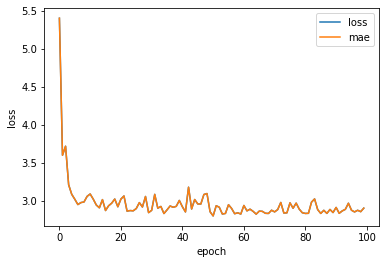

In [ ]:
#Plotting Loss Curve
pd.DataFrame(history_2.history).plot()
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
model_2.save('Length_Of_Cycle.h5')

# ***EstimatedDayofOvulation***

In [ ]:
Z=df['EstimatedDayofOvulation']

In [ ]:
X_train,X_test,Z_train,Z_test = train_test_split(X, Z, test_size=0.2, random_state=42)

In [ ]:
ct.fit(X_train)
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_3.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['mae']
)

#Creating a CallBack
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the Model
history=model_3.fit(X_train_ct, Z_train, epochs=200,callbacks=[lr_scheduler])

Epoch 1/200
42/42 [==============================] - 2s 4ms/step - loss: 16.9233 - mae: 16.9233 - lr: 1.0000e-04
Epoch 2/200
42/42 [==============================] - 0s 3ms/step - loss: 16.4427 - mae: 16.4427 - lr: 1.1220e-04
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 15.6071 - mae: 15.6071 - lr: 1.2589e-04
Epoch 4/200
42/42 [==============================] - 0s 3ms/step - loss: 14.0157 - mae: 14.0157 - lr: 1.4125e-04
Epoch 5/200
42/42 [==============================] - 0s 3ms/step - loss: 10.7331 - mae: 10.7331 - lr: 1.5849e-04
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 5.0185 - mae: 5.0185 - lr: 1.7783e-04
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 3.4683 - mae: 3.4683 - lr: 1.9953e-04
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 3.1607 - mae: 3.1607 - lr: 2.2387e-04
Epoch 9/200
42/42 [==============================] - 0s 3ms/step - loss: 2.8271 - mae: 2.8271 - lr: 2.

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_4.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['mae']
)


#Fit the Model
history_4=model_4.fit(X_train_ct, Z_train, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 15.7111 - mae: 15.7111
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 7.5523 - mae: 7.5523
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 3.8554 - mae: 3.8554
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 3.2537 - mae: 3.2537
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 2.8592 - mae: 2.8592
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 2.5322 - mae: 2.5322
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 2.1597 - mae: 2.1597
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 1.8216 - mae: 1.8216
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 1.5731 - mae: 1.5731
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 1.4354 - mae: 1.4354
Epoch 11/100
42/42 [==============================] - 0s 

In [ ]:
Z_pred = model_4.predict(X_test_ct)

11/11 [==============================] - 0s 2ms/step


In [ ]:
model_4.evaluate(X_test_ct,Z_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0284 - mae: 0.0284


[0.028359858319163322, 0.028359858319163322]

Text(0, 0.5, 'loss')

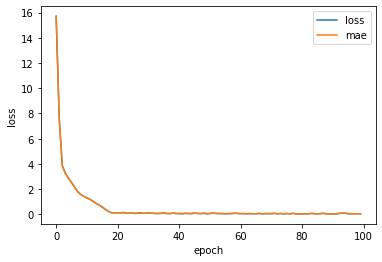

In [ ]:
#Plotting Loss Curve
pd.DataFrame(history_4.history).plot()
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
model_4.save('Estimated_Day_Of_Ovulation.h5')

# ***LengthofLutealPhase***

In [ ]:
I = df['LengthofLutealPhase']

In [ ]:
X_train,X_test,I_train,I_test = train_test_split(X, I, test_size=0.2, random_state=42)

In [ ]:
ct.fit(X_train)
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_5.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['mae']
)

#Creating a CallBack
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the Model
history=model_5.fit(X_train_ct, I_train, epochs=200,callbacks=[lr_scheduler])

Epoch 1/200
42/42 [==============================] - 1s 3ms/step - loss: 15.6691 - mae: 15.6691 - lr: 1.0000e-04
Epoch 2/200
42/42 [==============================] - 0s 3ms/step - loss: 15.3648 - mae: 15.3648 - lr: 1.1220e-04
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 14.8879 - mae: 14.8879 - lr: 1.2589e-04
Epoch 4/200
42/42 [==============================] - 0s 4ms/step - loss: 13.9902 - mae: 13.9902 - lr: 1.4125e-04
Epoch 5/200
42/42 [==============================] - 0s 3ms/step - loss: 11.9822 - mae: 11.9822 - lr: 1.5849e-04
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 7.3870 - mae: 7.3870 - lr: 1.7783e-04
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 4.8382 - mae: 4.8382 - lr: 1.9953e-04
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 4.6092 - mae: 4.6092 - lr: 2.2387e-04
Epoch 9/200
42/42 [==============================] - 0s 3ms/step - loss: 4.4313 - mae: 4.4313 - lr: 2.

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_6.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0028), 
    metrics=['mae']
)

#Fit the Model
history_6=model_6.fit(X_train_ct, I_train, epochs=100)

Epoch 1/100
42/42 [==============================] - 2s 5ms/step - loss: 8.3834 - mae: 8.3834
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 3.7812 - mae: 3.7812
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 2.1961 - mae: 2.1961
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 1.9570 - mae: 1.9570
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 1.8584 - mae: 1.8584
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 1.7888 - mae: 1.7888
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 1.7693 - mae: 1.7693
Epoch 8/100
42/42 [==============================] - 0s 5ms/step - loss: 1.8033 - mae: 1.8033
Epoch 9/100
42/42 [==============================] - 0s 5ms/step - loss: 1.7617 - mae: 1.7617
Epoch 10/100
42/42 [==============================] - 0s 4ms/step - loss: 1.7464 - mae: 1.7464
Epoch 11/100
42/42 [==============================] - 0s 3m

In [ ]:
I_pred = model_6.predict(X_test_ct)

11/11 [==============================] - 0s 2ms/step


In [ ]:
model_6.evaluate(X_test_ct,I_test)

11/11 [==============================] - 0s 2ms/step - loss: 1.7888 - mae: 1.7888


[1.7888174057006836, 1.7888174057006836]

Text(0, 0.5, 'loss')

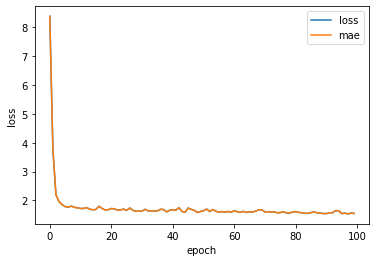

In [ ]:
#Plotting Loss Curve
pd.DataFrame(history_6.history).plot()
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
model_6.save('Lenght_of_Leutal_Phase')

# ***TotalDaysofFertility***

In [ ]:
K = df['TotalDaysofFertility']

In [ ]:
X_train,X_test,K_train,K_test = train_test_split(X, K, test_size=0.2, random_state=42)

In [ ]:
ct.fit(X_train)
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_7.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['mae']
)

#Creating a CallBack
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the Model
history=model_7.fit(X_train_ct, K_train, epochs=200,callbacks=[lr_scheduler])

Epoch 1/200
42/42 [==============================] - 3s 5ms/step - loss: 16.8533 - mae: 16.8533 - lr: 1.0000e-04
Epoch 2/200
42/42 [==============================] - 0s 7ms/step - loss: 16.4464 - mae: 16.4464 - lr: 1.1220e-04
Epoch 3/200
42/42 [==============================] - 0s 6ms/step - loss: 15.7280 - mae: 15.7280 - lr: 1.2589e-04
Epoch 4/200
42/42 [==============================] - 0s 6ms/step - loss: 14.3981 - mae: 14.3981 - lr: 1.4125e-04
Epoch 5/200
42/42 [==============================] - 0s 7ms/step - loss: 11.8603 - mae: 11.8603 - lr: 1.5849e-04
Epoch 6/200
42/42 [==============================] - 0s 6ms/step - loss: 6.7630 - mae: 6.7630 - lr: 1.7783e-04
Epoch 7/200
42/42 [==============================] - 0s 6ms/step - loss: 3.3731 - mae: 3.3731 - lr: 1.9953e-04
Epoch 8/200
42/42 [==============================] - 0s 6ms/step - loss: 3.2051 - mae: 3.2051 - lr: 2.2387e-04
Epoch 9/200
42/42 [==============================] - 0s 6ms/step - loss: 3.0274 - mae: 3.0274 - lr: 2.

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_8.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0447), 
    metrics=['mae']
)

#Fit the Model
history_8=model_8.fit(X_train_ct, K_train, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 4.2046 - mae: 4.2046
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 2.1288 - mae: 2.1288
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 1.3378 - mae: 1.3378
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1223 - mae: 1.1223
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0123 - mae: 1.0123
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 1.7517 - mae: 1.7517
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 0.7013 - mae: 0.7013
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 0.7643 - mae: 0.7643
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 1.3134 - mae: 1.3134
Epoch 10/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7362 - mae: 0.7362
Epoch 11/100
42/42 [==============================] - 0s 3m

In [ ]:
I_pred = model_8.predict(X_test_ct)

11/11 [==============================] - 0s 2ms/step


In [ ]:
model_8.evaluate(X_test_ct,K_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.6661 - mae: 0.6661


[0.6661013960838318, 0.6661013960838318]

Text(0, 0.5, 'loss')

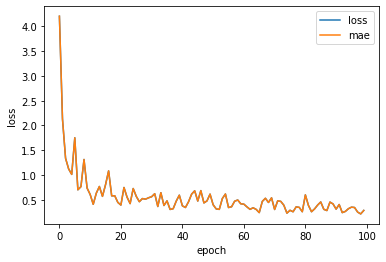

In [ ]:
#Plotting Loss Curve
pd.DataFrame(history_8.history).plot()
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
model_8.save('Total_Days_Of_Fertility.h5')

# ***TotalMensesScore***

In [ ]:
L = df['TotalMensesScore']

In [ ]:
X_train,X_test,L_train,L_test = train_test_split(X, L, test_size=0.2, random_state=42)

In [ ]:
ct.fit(X_train)
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_9.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['mae']
)

#Creating a CallBack
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the Model
history=model_9.fit(X_train_ct, L_train, epochs=200,callbacks=[lr_scheduler])

Epoch 1/200
42/42 [==============================] - 1s 3ms/step - loss: 9.7238 - mae: 9.7238 - lr: 1.0000e-04
Epoch 2/200
42/42 [==============================] - 0s 3ms/step - loss: 9.2886 - mae: 9.2886 - lr: 1.1220e-04
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 8.5292 - mae: 8.5292 - lr: 1.2589e-04
Epoch 4/200
42/42 [==============================] - 0s 3ms/step - loss: 7.0872 - mae: 7.0872 - lr: 1.4125e-04
Epoch 5/200
42/42 [==============================] - 0s 3ms/step - loss: 4.3959 - mae: 4.3959 - lr: 1.5849e-04
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 2.2160 - mae: 2.2160 - lr: 1.7783e-04
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 2.0897 - mae: 2.0897 - lr: 1.9953e-04
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 2.0208 - mae: 2.0208 - lr: 2.2387e-04
Epoch 9/200
42/42 [==============================] - 0s 3ms/step - loss: 1.9462 - mae: 1.9462 - lr: 2.5119e-04
E

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_10.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0045), 
    metrics=['mae']
)

#Fit the Model
history_10=model_10.fit(X_train_ct, L_train, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 3.3013 - mae: 3.3013
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 1.8014 - mae: 1.8014
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 1.6073 - mae: 1.6073
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 1.4759 - mae: 1.4759
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5252 - mae: 1.5252
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 1.4405 - mae: 1.4405
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 1.3506 - mae: 1.3506
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 1.2494 - mae: 1.2494
Epoch 9/100
42/42 [==============================] - 0s 5ms/step - loss: 1.2556 - mae: 1.2556
Epoch 10/100
42/42 [==============================] - 0s 5ms/step - loss: 1.3180 - mae: 1.3180
Epoch 11/100
42/42 [==============================] - 0s 4m

In [ ]:
model_10.evaluate(X_test_ct,L_test)

11/11 [==============================] - 0s 3ms/step - loss: 1.3464 - mae: 1.3464


[1.3463959693908691, 1.3463959693908691]

Text(0, 0.5, 'loss')

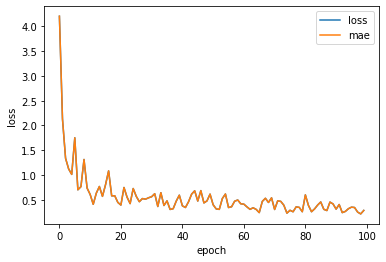

In [ ]:
#Plotting Loss Curve
pd.DataFrame(history_8.history).plot()
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
model_10.save('Total_Menses_Score.h5')

# ***Group***

In [ ]:
A = df['Group']

In [ ]:
X_train,X_test,A_train,A_test = train_test_split(X, A, test_size=0.2, random_state=42)

In [ ]:
ct.fit(X_train)
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_class = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(2,activation='softmax')
])

#Compile the Model
model_class.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
    metrics=['accuracy']
)

#Fit the Model
history_class=model_class.fit(X_train_ct,A_train,epochs=60)

Epoch 1/60
42/42 [==============================] - 1s 3ms/step - loss: 0.6491 - accuracy: 0.6225
Epoch 2/60
42/42 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.7189
Epoch 3/60
42/42 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.9239
Epoch 4/60
42/42 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.9721
Epoch 5/60
42/42 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9925
Epoch 6/60
42/42 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9970
Epoch 7/60
42/42 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 1.0000
Epoch 8/60
42/42 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 1.0000
Epoch 9/60
42/42 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 10/60
42/42 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 11/60
42/42 [

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 5,
 reg_lambda= 1,
 max_depth= 5,
 learning_rate= 0.01,
 gamma= 1,
 colsample_bytree= 0.5)

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy",verbose=2)

# Fit
grid_cv.fit(X_train_ct, A_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=1, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='accuracy', verbose=2)

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
xgb_cl = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 1,
 reg_lambda= 0,
 max_depth= 3,
 learning_rate= 0.1,
 gamma= 0,
 colsample_bytree= 0.5)

In [ ]:
xgb_cl.fit(X_train_ct,A_train)
A_preds = xgb_cl.predict(X_test_ct)

In [ ]:
accuracy_score(A_test,A_preds)

1.0

In [ ]:
xgb_cl1 = xgb.XGBClassifier()
xgb_cl1.fit(X_train_ct,A_train)
A_preds1 = xgb_cl1.predict(X_test_ct)

In [ ]:
accuracy_score(A_test,A_preds1)

1.0

In [ ]:
%%time

#Different HyperParameters
rs_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,10,2),
          "min_samples_leaf":np.arange(1,10,2),
          "max_features":[0.5,1,"sqrt",'log2']}

#Instatantiate Randomised Search CV
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                             param_distributions=rs_grid,
                             cv=5,
                             verbose=2,
                             n_iter=1000,                              
                        return_train_score=True)
rs_model.fit(X_train_ct,A_train)

Streaming output truncated to the last 5000 lines.
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=1000,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   return_train_score=True, verbose=2)

In [ ]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': 10}

In [ ]:
rcl = RandomForestClassifier(n_jobs=-1,random_state=42,
                             n_estimators= 60,
                             min_samples_split= 6,
                             min_samples_leaf= 5,
                             max_features= 0.5,
                             max_depth= 10)

In [ ]:
rcl.fit(X_train_ct,A_train)

RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=60, n_jobs=-1,
                       random_state=42)

In [ ]:
A_preds2 = rcl.predict(X_test_ct)
accuracy_score(A_test,A_preds2)

1.0

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_class_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(2,activation='softmax')
])

#Compile the Model
model_class_01.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
    metrics=['accuracy']
)

#Fit the Model
history_class_01=model_class_01.fit(X_train_ct,A_train,epochs=5)

Epoch 1/5
42/42 [==============================] - 1s 4ms/step - loss: 0.7992 - accuracy: 0.4680
Epoch 2/5
42/42 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6127
Epoch 3/5
42/42 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.6948
Epoch 4/5
42/42 [==============================] - 0s 4ms/step - loss: 0.4728 - accuracy: 0.8470
Epoch 5/5
42/42 [==============================] - 0s 4ms/step - loss: 0.3710 - accuracy: 0.9638


In [ ]:
model_class_01.save('Group_Menstrual.h5')